<a href="https://colab.research.google.com/github/kuma987/Section-1-Project/blob/main/code/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section1 Project**

## **Project 문제 정의**

### **배경**
- 우리 기업는 현재 국내 중견기업 게임회사입니다.
- 2016년 새로운 회사 비전으로 '아시아 게임시장을 대표할 수 있는 기업'이 세워졌습니다.
- 아시아 게임시장에서의 규모와, 현재 기업이 가지고 있는 데이터에서 확인할 수 있는 일본 시장을 우선적으로 목표로 하고 있습니다.
-  회사의 주요 업무들이 국내 시장 위주로 운영되어왔기 때문에, 이번 일본 시장 분석 및 게임 설계는 초창기 단계로 많은 지원비가 주어지지 않았습니다.

### **Project 목표**
> 주어진 데이터를 바탕으로 **일본 지역에서 성과를 거둘 수 있는 게임 설계**합니다.

- 일본 지역은 다른 지역과 비교했을 때 어떤 특징을 가지고 있는지 파악합니다.
- 일본 지역에서 연도별 게임 트렌드가 어떻게 변하고 있는지 파악합니다.
- 인기가 많은 게임들은 어떤 특징을 가지고 있는지 파악합니다.
- 위 과정들을 바탕으로 필요한 경우 추가적인 분석을 수행하고, 어떤 게임을 설계해야 하는지 인사이트를 제시합니다.

### **Data Description**
준비된 데이터는 **2015년까지 출시된 게임들의 각 지역에서의 출고량 데이터**입니다.
- `Name` : 게임의 이름
- `Platform` : 게임이 지원되는 플랫폼의 이름
- `Year` : 게임이 출시된 연도
- `Genre` : 게임의 장르
- `Publisher` : 게임을 배급한 회사
- `NA_Sales` : 북미지역에서의 출고량
- `EU_Sales` : 유럽지역에서의 출고량
- `JP_Sales` : 일본지역에서의 출고량
- `Other_Sales` : 기타지역에서의 출고량

In [ ]:
# 패키지 불러오기
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings(action='ignore')

from scipy import stats

plt.rc('font', family='NanumGothic')
%config InlineBackend.figure_format='retina'

from google.colab import drive

In [ ]:
# 한글 안 나올 경우 아래 코드 실행하고 런타인 재시작
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''
print()

In [ ]:
# 데이터 불러오기
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 저장 위치

/content/drive/MyDrive/Codestates/N100/Project/data


## **데이터 전처리**

### 데이터 탐색
- 불러온 데이터를 확인합니다.

In [ ]:
data = pd.read_csv('vgames2.csv')

In [ ]:
data.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


- 데이터를 살펴본 결과, `Unnamed: 0`라는 불필요한 칼럼이 생성되었음을 확인했습니다.  
- 해당 칼럼을 제거한 뒤, 본격적으로 데이터 전처리를 시작하겠습니다.

In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace=True)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
data.shape

(16598, 9)

### 결측치 처리
- 데이터를 살펴본 결과, `Year`, `Genre` `Publisher` 세 칼럼에서 결측치가 나타나고 있습니다.  
- 데이터의 특징을 바탕으로, 결측치를 제거 혹은 대체하기로 결정했습니다.

In [ ]:
data.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

`Year`
- 271개의 결측치가 존재합니다.
- 연도별 게임 트렌드를 파악하는 것이 이번 분석의 주요 과정 중 하나이기 때문에, **연도를 임의의 값으로 대체하는 것은 향후 분석 결과에 영향을 미칠 수 있습니다.**
- 결측치가 나타난 게임명을 직접 검색해서 결측치를 채울 수 있으나, Section 1에서 배운 기법을 활용하는 것이 아니며, 결측치가 있는 데이터 자체도 전체 데이터의 2%도 안되기 때문에 **제거**하기로 결정했습니다.
- **`Year` 컬럼이 결측치인 행을 제거할 경우, `Genre`, `Publisher`의 결측치를 대체하는데 필요한 정보가 제거될 것을 염두해서, 다른 두 칼럼의 결측치부터 대체하기로 했습니다.**

`Genre`
- 50개의 결측치가 존재합니다.
- 동일명의 게임이 존재하는 경우, 출시연도가 다르다면 다른 게임이기는 하지만, 보통 리메이크나 후속작이기 때문에 장르는 동일합니다.
- 따라서 동일명의 게임이 존재하는 경우, 해당 데이터의 `Genre`로 결측치를 대체할 수 있습니다.  


In [ ]:
data.query("Name == 'NBA Ballers'")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
3337,NBA Ballers,PS2,2004.0,Sports,Midway Games,0.81,0.63,0,0.21


In [ ]:
# Genre가 결측치지만, 동일명의 게임이 존재하는 경우
Genre_null = data[data['Genre'].isna() & data.duplicated('Name', keep=False)]
Genre_null_idx = Genre_null.index
Genre_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0
3932,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.1,0.06,0,0.18
4148,Grand Theft Auto IV,PC,2008.0,NaN,Take-Two Interactive,0.01,0.79,0,0.08
4545,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,NaN,Namco Bandai Games,0.39,0.1,0.01,0.04
5713,Back to the Future: The Game,XOne,2015.0,NaN,Telltale Games,0,0.02,0,0
7336,Madden NFL 11,PS2,2010.0,NaN,Electronic Arts,0.41,0.02,0,0.07
10432,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,NaN,Vivendi Games,0.08,0,0,0.01


In [ ]:
for i in Genre_null_idx : 
  game_name = data.iloc[i]['Name']
  if len(data[data['Name'] == game_name]['Genre'].dropna()) != 0 : # 동명 게임 중 결측치가 아닌 값이 하나라도 존재한다면
    data.loc[i,'Genre'] =  data[data['Name'] == game_name]['Genre'].dropna().unique()[0] # 해당 값으로 결측치를 대체

In [ ]:
# 장르 값이 대체되었음을 확인할 수 있습니다.
data.iloc[Genre_null_idx]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
408,NBA Ballers,XB,2004.0,Sports,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,Sports,Electronic Arts,0.49,0.15,0,0.02
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,Racing,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,Action,Ubisoft,0.07,0.02,0,0
3932,MVP Baseball 2004,PS2,2004.0,Sports,Electronic Arts,1.1,0.06,0,0.18
4148,Grand Theft Auto IV,PC,2008.0,Action,Take-Two Interactive,0.01,0.79,0,0.08
4545,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,Fighting,Namco Bandai Games,0.39,0.1,0.01,0.04
5713,Back to the Future: The Game,XOne,2015.0,Adventure,Telltale Games,0,0.02,0,0
7336,Madden NFL 11,PS2,2010.0,Sports,Electronic Arts,0.41,0.02,0,0.07
10432,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,Action,Vivendi Games,0.08,0,0,0.01


In [ ]:
data["Genre"].isna().sum()

30

- 일련의 방법으로 결측치를 대체했으나, 여전히 30개의 결측치가 존재합니다.
- 결측치가 나타난 게임명을 직접 검색해서 결측치를 채울 수 있으나, Section 1에서 배운 기법을 활용하는 것이 아니며, 결측치가 있는 데이터 자체도 전체 데이터의 1%도 안되기 때문에, 결측치를 제거하기로 결정했습니다.
- **`Genre` 컬럼이 결측치인 행을 제거할 경우, `Publisher`의 결측치를 대체하는데 필요한 정보가 제거될 것을 염두해서, `Publisher`의 결측치부터 대체하기로 했습니다.**


`Publisher`
- 58개의 결측치가 존재합니다.
- 그러나 `Unknown`으로 기입된 데이터까지 포함하면, 총 261개의 결측치가 존재합니다.

In [ ]:
data[data['Publisher'] == 'Unknown'].shape[0] + data['Publisher'].isna().sum()

261

- 동일명의 게임이 존재하더라도, 플랫폼에 따라 배급사가 달라지는 경우가 있습니다.
- 따라서 다른 칼럼 내용을 바탕으로 `Publisher`의 결측치를 대체하기는 어렵습니다.
- 결측치가 나타난 게임명을 직접 검색해서 결측치를 채울 수 있으나, Section 1에서 배운 기법을 활용하는 것이 아니며, 결측치가 있는 데이터 자체도 전체 데이터의 2%도 안되기 때문에, 결측치를 제거하기로 결정했습니다.

- `Genre`와 `Publisher`의 결측치 대체를 마쳤으니, 이제 남은 결측치를 제거하겠습니다.

In [ ]:
# Year 칼럼에만 결측치가 존재하는 모습
data.isna().sum()

Name             0
Platform         0
Year           271
Genre           30
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 데이터의 결측치 제거
data.dropna(axis=0, inplace=True)
data = data.reset_index(drop=True)

In [ ]:
data.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
data.shape

(16261, 9)

### 데이터 타입 변경
- 데이터를 살펴본 결과, 데이터의 형태가 의도한대로 표시되지 않거나, 통일성이 없는 경우가 존재합니다.
- 따라서 해당 칼럼을 살펴본 후, 데이터 형태를 의도한대로 수정하겠습니다.

`Year`
- `Year` 칼럼의 경우, 연도를 나타내는 칼럼임에도 불구하고 소숫점 첫째자리까지 기입된 모습이 보입니다.
- 따라서 데이터 타입을 정수로 바꾸었습니다.

In [ ]:
data["Year"].head()

0    2008.0
1    2009.0
2    2010.0
3    2010.0
4    2010.0
Name: Year, dtype: float64

In [ ]:
data['Year'] = data['Year'].astype(int)

In [ ]:
data["Year"].head()

0    2008
1    2009
2    2010
3    2010
4    2010
Name: Year, dtype: int64

`_Sales`
- 출고량과 관련된 `_Sales` 칼럼들은 수치형으로 바꾸고 싶지만, 우선적으로 해결해야할 문제가 있습니다.
  - 데이터가 무엇을 나타내는지 단위가 명확하지 않습니다.
  - 대부분의 데이터는 수치만 기입되어 있지만, 일부 데이터는 `M`, `K` 단위가 붙어있습니다.
- 따라서 우선적으로 출고량이 높은 데이터를 바탕으로 `_Sales` 칼럼의 데이터 단위를 확인하겠습니다.

In [ ]:
data.sort_values(['NA_Sales'], ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14054,Animal Planet: Vet Life,Wii,2009,Simulation,Activision,90K,0,0,0.01
12798,Mark Davis Pro Bass Challenge,PS2,2002,Sports,Natsume,90K,0.07,0,0.02
13519,King of Clubs: Mini Golf,Wii,2008,Sports,Oxygen Interactive,90K,0,0,0.01
10448,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92
6127,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13
...,...,...,...,...,...,...,...,...,...
6158,Boulder Dash: Rocks!,DS,2007,Puzzle,10TACLE Studios,0,0.03,0,0
12443,Who Wants to be a Millionaire: 1st Edition,Wii,2007,Misc,Ubisoft,0,0.03,0,0
6161,Project CARS,PC,2015,Racing,Slightly Mad Studios,0,0.1,0,0.01
12440,Saikyou Habu Shogi,N64,1996,Misc,Seta Corporation,0,0,0.06,0.03


- 위 표에서 4번째 행에 속하는 `Mario Kart DS`의 경우, [해당 사이트](https://www.nintendo.co.jp/ir/en/finance/software/ds.html)에 따르면 전세계적으로 2360만장이 판매되었습니다.
- 이 사실을 바탕으로 출고량의 데이터 단위는 `M(백만)`임을 확인할 수 있습니다.
- 따라서 `M` 표시가 붙은 데이터는 `M`표시를 제거해서 해결 가능합니다.
- `K` 표시가 붙은 데이터의 경우, 다음과 같이 두 가지로 해석이 가능합니다.
  1. `M`을 `K`로 잘못 기입했다. (단순 입력 오류)
  2. 데이터 단위가 `M(백만)`인데, `K(천)`으로 잘못 기입했다. (데이터 단위 오류)
- 따라서 유명 게임 시리즈인 `StarCraft`를 통해 `K`표시가 붙은 데이터의 해석 방법을 확인하겠습니다.

In [ ]:
data.query("Name == 'StarCraft II: Wings of Liberty'")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2774,StarCraft II: Wings of Liberty,PC,2010,Strategy,Activision,2.56,1.68,0,0.59


In [ ]:
data.query("Name == 'StarCraft II: Heart of the Swarm'")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6888,StarCraft II: Heart of the Swarm,PC,2013,Strategy,Activision,820K,0.65,0,190K


- [가장 많이 팔린 PC 게임 목록](https://ko.wikipedia.org/wiki/%EA%B0%80%EC%9E%A5_%EB%A7%8E%EC%9D%B4_%ED%8C%94%EB%A6%B0_PC_%EA%B2%8C%EC%9E%84_%EB%AA%A9%EB%A1%9D)을 바탕으로 해석하면, 해당 데이터가 입력된 시기가 현재와 다르기 때문에 값이 다르게 나타나지만, **`StarCraft II: Wings of Liberty`가 `StarCraft II: Heart of the Swarm`보다 많이 판매되었습니다.**
- 따라서 `K`가 붙은 데이터들은 **데이터 단위 오류**로 해석하는게 적절해보입니다.

앞서 확인한 내용들을 정리하면 다음과 같습니다.
- `_Sales` 칼럼의 데이터 단위는 `M`이다.
- `M` 표시가 붙은 경우, 해당 표시를 제거한다.
- `K` 표시가 붙은 경우, 해당 표시를 제거하고 데이터 단위를 `M`으로 수정한다.

In [ ]:
# M 표시가 있는 데이터 목록
m_mark = data[data['NA_Sales'].str.contains('M') | data['EU_Sales'].str.contains('M') | data['JP_Sales'].str.contains('M') | data['Other_Sales'].str.contains('M')]
m_mark_idx = list(m_mark.index)
m_mark

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.3,0.03M,0.04,0.03
62,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,0,0,0M
71,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
173,Max Payne,GBA,2003,Shooter,Take-Two Interactive,0.02,0.01M,0,0
...,...,...,...,...,...,...,...,...,...
16077,Yu-Gi-Oh! Ultimate Masters: World Championship...,GBA,2006,Misc,Konami Digital Entertainment,0.14,0.05,0.07,0.01M
16145,Super Robot Taisen F Kanketsuhen,SAT,98,Strategy,Banpresto,0M,0,0.55,0
16162,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006,Action,505 Games,0,0,0.07M,0
16234,Koihime Enbu,PS4,2016,Fighting,Yeti,0,0M,0.02,0


In [ ]:
# 출고량 칼럼에 M 표시 붙은 데이터는 M 표시만 제거
data['NA_Sales'] = data['NA_Sales'].str.replace('M','')
data['EU_Sales'] = data['EU_Sales'].str.replace('M','')
data['JP_Sales'] = data['JP_Sales'].str.replace('M','')
data['Other_Sales'] = data['Other_Sales'].str.replace('M','')

In [ ]:
# M 표시가 제거된 모습
data.iloc[m_mark_idx]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33,0K,0.06
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.3,0.03,0.04,0.03
62,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,0,0,0
71,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,0.06,0,0.01
173,Max Payne,GBA,2003,Shooter,Take-Two Interactive,0.02,0.01,0,0
...,...,...,...,...,...,...,...,...,...
16077,Yu-Gi-Oh! Ultimate Masters: World Championship...,GBA,2006,Misc,Konami Digital Entertainment,0.14,0.05,0.07,0.01
16145,Super Robot Taisen F Kanketsuhen,SAT,98,Strategy,Banpresto,0,0,0.55,0
16162,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006,Action,505 Games,0,0,0.07,0
16234,Koihime Enbu,PS4,2016,Fighting,Yeti,0,0,0.02,0


In [ ]:
# K 표시가 있는 데이터 목록
k_mark = data[data['NA_Sales'].str.contains('K') | data['EU_Sales'].str.contains('K') | data['JP_Sales'].str.contains('K') | data['Other_Sales'].str.contains('K')]
k_mark_idx = list(k_mark.index)
k_mark

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
87,Bugs Bunny: Lost in Time,PS,1999,Platform,Infogrames,0.22,0.15,0K,0.03
88,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,0.02,0K,0.02
125,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0,0K,0.01,0
...,...,...,...,...,...,...,...,...,...
16139,NBA Ballers: Chosen One,PS3,2008,Sports,Midway Games,0.12,0,0K,0.01
16155,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12
16188,Planet Monsters,GBA,2001,Action,Titus,0.01,0K,0,0
16241,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,320K,0.22,0,0.04


In [ ]:
# 출고량 칼럼에 K 표시 붙은 데이터는 데이터 단위를 M으로 변경한 다음, K 표시 제거
# 이후 소수점 둘째자리 까지 표시
Sales_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i in range(len(data)) :
  for sale in Sales_list :
    if 'K' in data[sale][i] :
      data[sale][i] = round(float(data[sale][i].replace("K",'')) / 1000, 2)

In [ ]:
# K 표시가 제거되고 단위가 바뀐 모습
data.iloc[k_mark_idx]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0.0,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03
87,Bugs Bunny: Lost in Time,PS,1999,Platform,Infogrames,0.22,0.15,0.0,0.03
88,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,0.02,0.0,0.02
125,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0,0.0,0.01,0
...,...,...,...,...,...,...,...,...,...
16139,NBA Ballers: Chosen One,PS3,2008,Sports,Midway Games,0.12,0,0.0,0.01
16155,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12
16188,Planet Monsters,GBA,2001,Action,Titus,0.01,0.0,0,0
16241,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,0.32,0.22,0,0.04


In [ ]:
# 출고량 칼럼의 데이터 타입을 수치형으로 변경
for sale in Sales_list : 
  data[sale] = data[sale].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16261 entries, 0 to 16260
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16261 non-null  object 
 1   Platform     16261 non-null  object 
 2   Year         16261 non-null  int64  
 3   Genre        16261 non-null  object 
 4   Publisher    16261 non-null  object 
 5   NA_Sales     16261 non-null  float64
 6   EU_Sales     16261 non-null  float64
 7   JP_Sales     16261 non-null  float64
 8   Other_Sales  16261 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### 이상치 처리
- 데이터를 살펴본 결과, `Year` 칼럼에서 이상치가 존재함을 확인했습니다.
- 이상치에 해당하는 데이터를 살펴본 후, 이상치 값을 제거 혹은 대체하겠습니다.

`Year`
- 데이터의 분포를 살펴본 결과, 특정 데이터들의 연도가 굉장히 낮게 나타나고 있습니다.

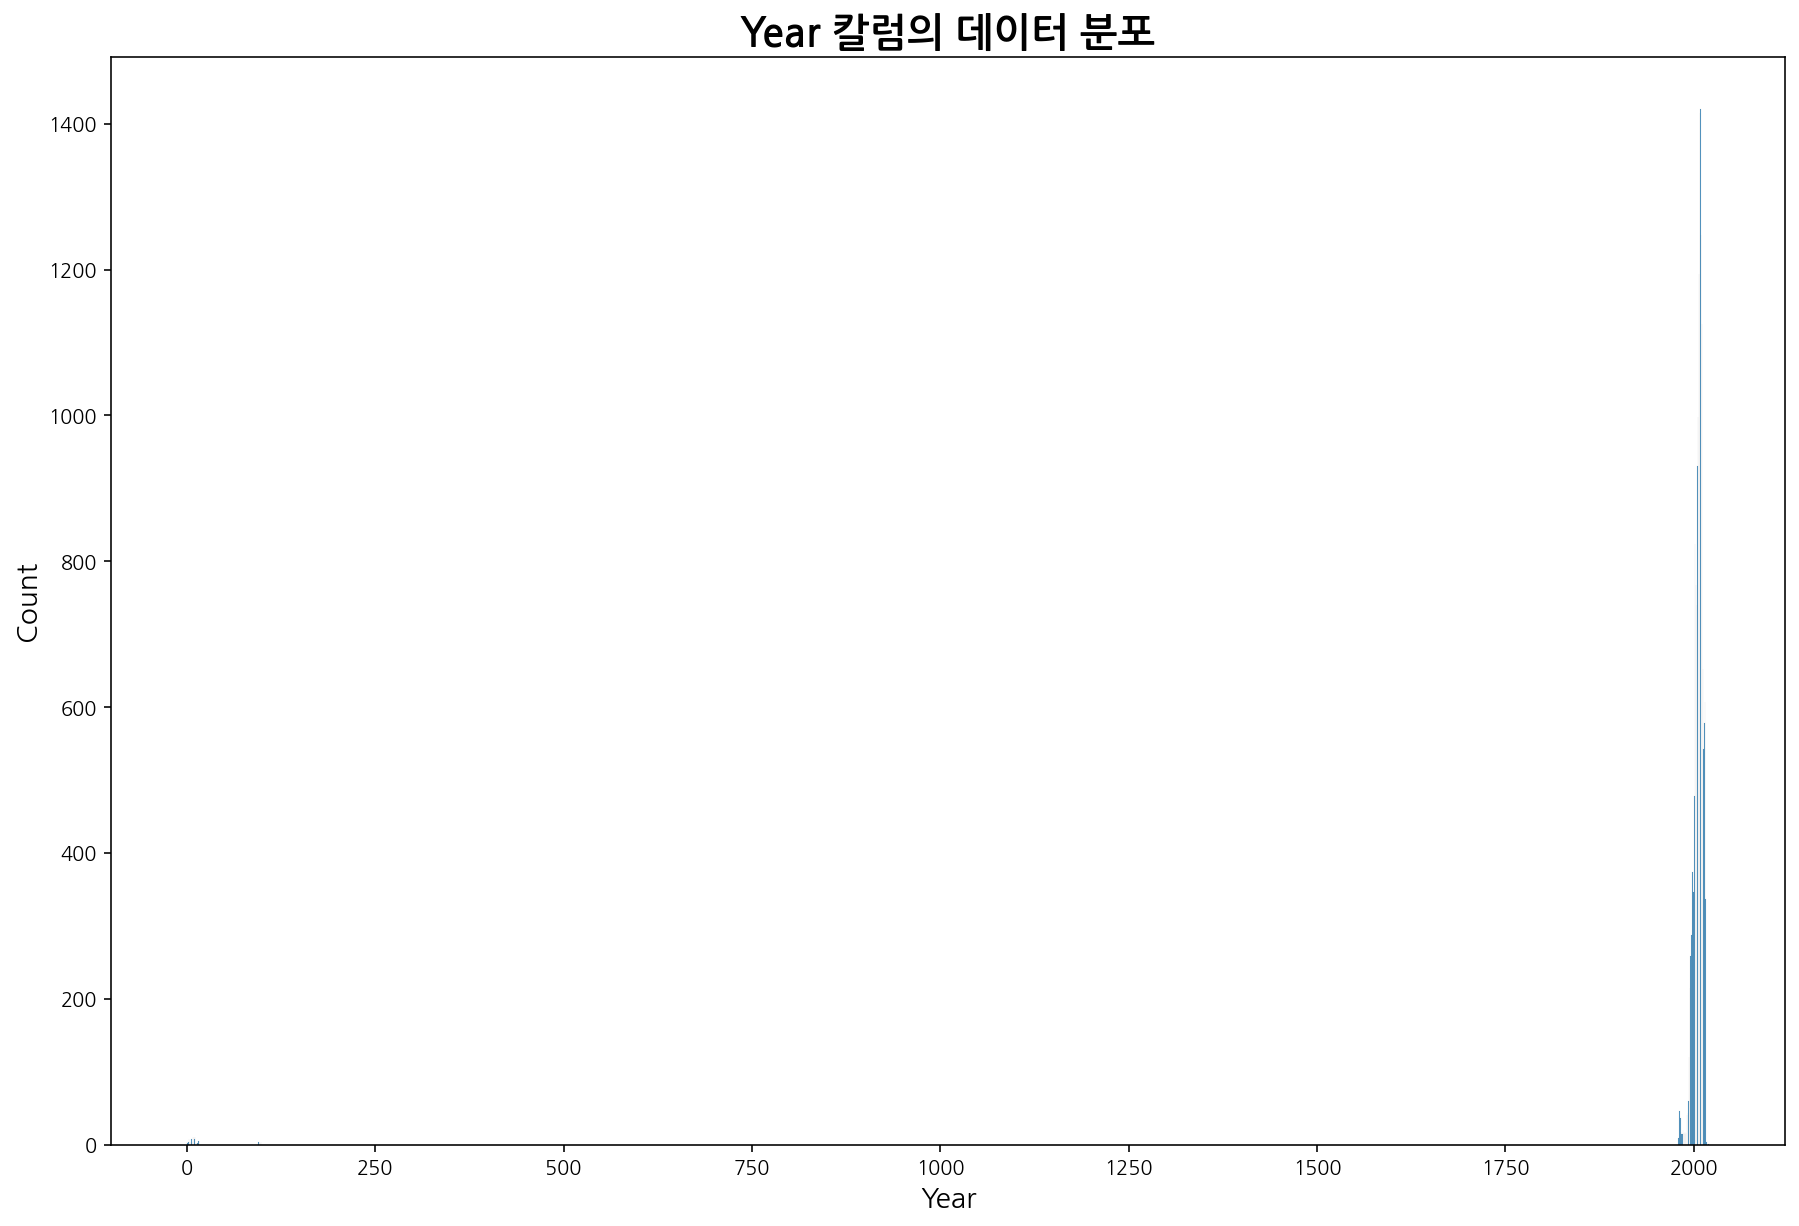

In [ ]:
plt.figure(figsize=(15,10))
plt.rc('axes', labelsize=14)

sns.histplot(data['Year'])
plt.title('Year 칼럼의 데이터 분포', fontsize = 20, fontweight='bold')
plt.show()

- 데이터 분포 그래프가 위와 같이 나타난 경우, **단위가 굉장히 낮은 데이터들이 존재함**을 의미합니다.

In [ ]:
# Year에 1900 보다 작은 숫자가 기입된 데이터 파악
year_out = data.query('Year <= 1900')
year_out

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00
759,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
15658,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0.00,0.00,0.02,0.00
15773,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0.00,0.00,0.00
15818,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16059,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00


In [ ]:
year_out["Year"].describe()

count    100.000000
mean      20.470000
std       30.671098
min        0.000000
25%        6.000000
50%        9.000000
75%       14.000000
max       98.000000
Name: Year, dtype: float64

- 해당 데이터들을 실제로 구글에서 확인해보면, 데이터가 아예 잘못 기입된 경우가 아니라
- **네 자릿수 연도가 아닌, 두 자릿수 연도로 기입되었음을 확인할 수 있습니다.**
- 따라서 데이터에 따라 1900 또는 2000을 붙어주어야 합니다.

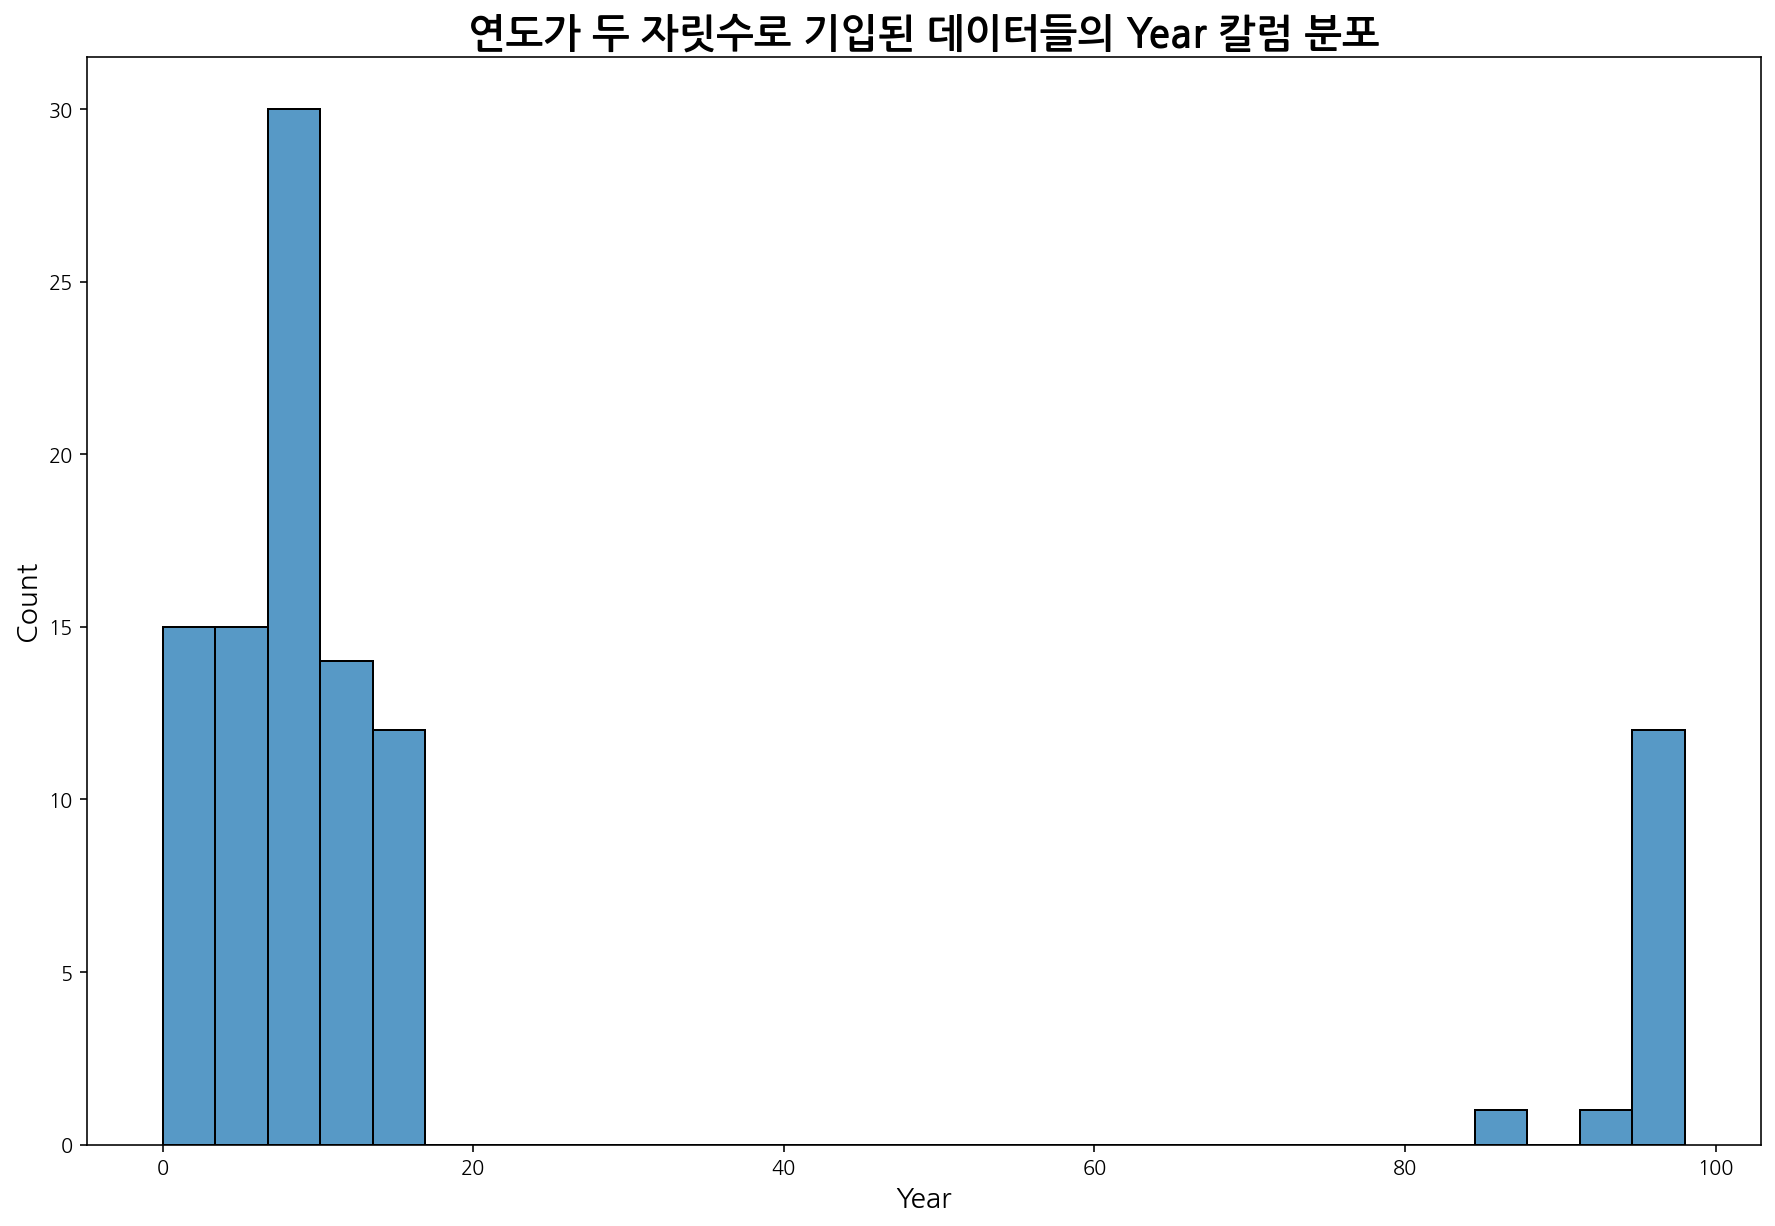

In [ ]:
plt.figure(figsize=(15,10))
plt.rc('axes', labelsize=14)

sns.histplot(year_out['Year'])
plt.title('연도가 두 자릿수로 기입된 데이터들의 Year 칼럼 분포', fontsize = 20, fontweight='bold')
plt.show()

- 위 그림을 바탕으로, 20보다 적은 값을 가지는 경우 2000을 붙여주고, 80~100 사이의 값들은 1900을 붙여주는 것이 적절하다고 판단했습니다.

In [ ]:
for i in year_out.index :
  if data['Year'][i] <= 20 :
    data['Year'][i] += 2000
  else :
    data['Year'][i] += 1900

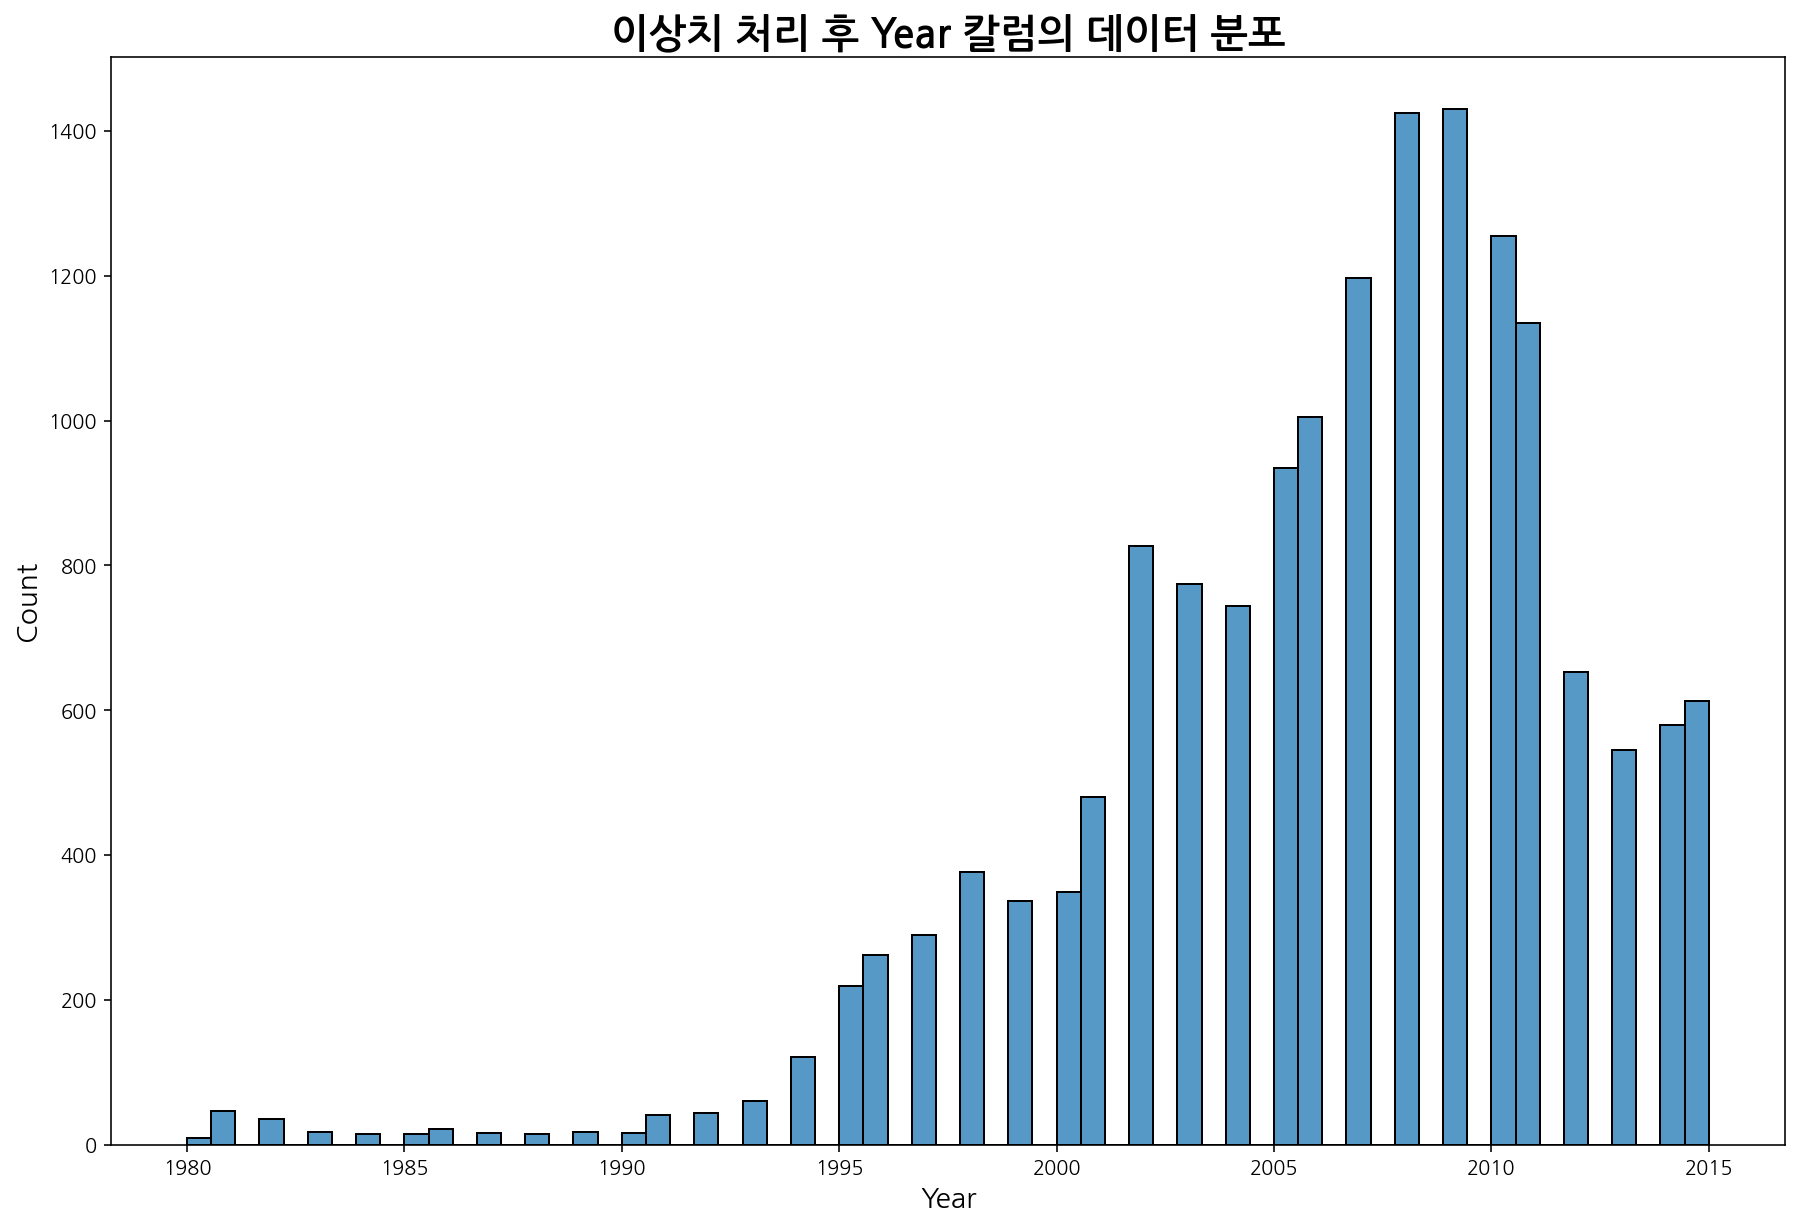

In [ ]:
plt.figure(figsize=(15,10))
plt.rc('axes', labelsize=14)

sns.histplot(data['Year']);
plt.title('이상치 처리 후 Year 칼럼의 데이터 분포', fontsize = 20, fontweight='bold')
plt.show()

- 이상치가 처리된 후 데이터의 분포가 정상적인 모습을 보이고 있다는 것을 확인할 수 있습니다.

참고 : `_Sales`
- 출고량의 데이터 단위가 `M`으로 크기 때문에 대부분의 데이터들이 0값 근처에 있습니다.
- 특정 게임들의 경우 출고량이 많이 나타나는데, 이는 실제로 확인해봐도 정말 출고량이 많은 경우입니다.
- 따라서 데이터 분포상 이상치가 있어보이지만, 실제값이 잘못 기입되지 않았다고 판단해서 별도의 수정을 가하지 않았습니다.

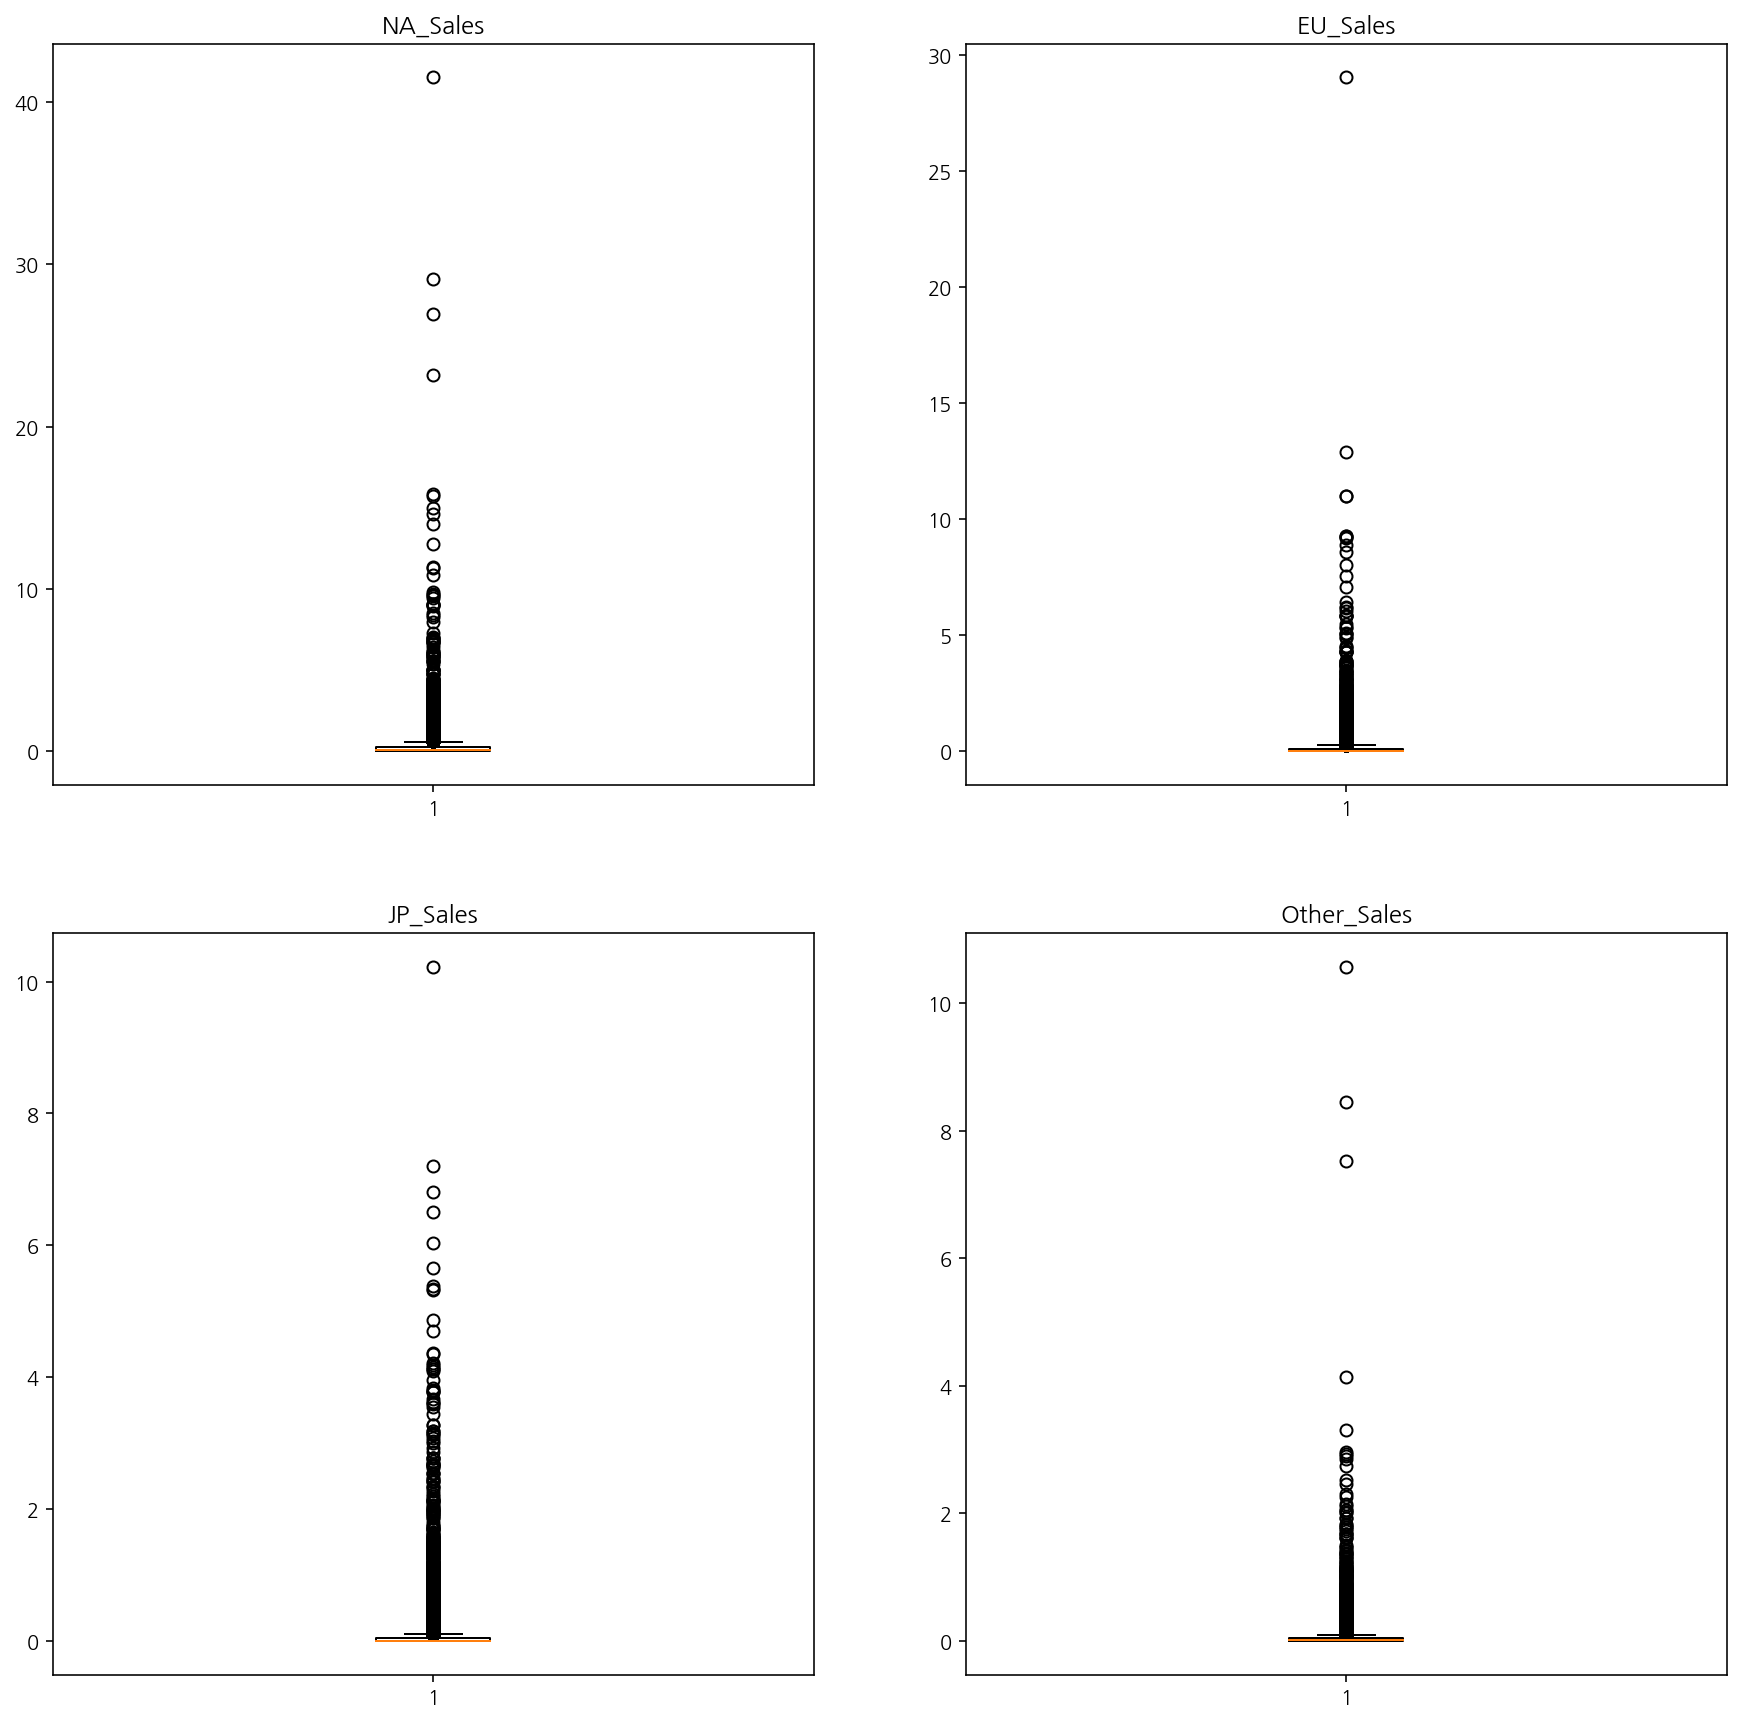

In [ ]:
df_columns = data.iloc[:,-4:].columns

i = 0
fig, axs = plt.subplots(2,2, figsize = (15,15))

for j in range(2):
  for k in range(2):
    axs[j,k].boxplot(data[df_columns[i]])
    axs[j,k].set_title(df_columns[i])
    i += 1

plt.show()

In [ ]:
# Sales 상위 데이터를 보았을 때 실제로 유명한 게임들에 속한다.
data.sort_values('NA_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2857,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
4119,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
10290,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
1188,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12331,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
...,...,...,...,...,...,...,...,...,...
6123,Shin Megami Tensei: Devil Survivor 2,3DS,2015,Role-Playing,Atlus,0.00,0.03,0.09,0.00
12398,FIFA 17,PC,2016,Sports,Electronic Arts,0.00,0.05,0.00,0.00
12397,Natsuiro High School: Seishun Hakusho,PS4,2015,Action,D3Publisher,0.00,0.00,0.02,0.00
6125,Yamasa Digi World SP: Moeyo! Kung Fu Shukujo,PS2,2006,Misc,Yamasa Entertainment,0.00,0.00,0.02,0.00


### 중복값 처리
- 게임명, 플랫폼, 출시연도가 데이터의 식별자 역할을 할 것이라 판단해서, `Name`, `Platform`, `Year` 칼럼으로 중복치를 살펴보았습니다.

In [ ]:
data[data.duplicated(['Name', 'Platform', 'Year'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7208,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8552,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00


- 1개의 게임이 중복되었음을 확인했습니다.
- 해당 데이터는 출고량을 제외하고는 모든 칼럼 값이 동일했습니다.
- 따라서 출고량 값이 거의 없는 8552번 행을 잘못 기입된 값으로 판단하고, 제거했습니다.

In [ ]:
data.drop([8552], axis = 0, inplace=True)
data = data.reset_index(drop=True)

In [ ]:
# 중복 데이터가 사라진 모습
data[data.duplicated(['Name', 'Platform', 'Year'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


### 칼럼 변경
`Total_Sales`
- 총 출고량을 나타내는 `Total_Sales` 칼럼 생성했습니다.

In [ ]:
data['Total_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']

In [ ]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


`Years`
- 배경에 의해, 현재 우리가 가지고 있는 데이터는 **2015년까지 출시된 게임**이기 때문에, 2015년 이후에 출시된 게임들이 데이터에 존재할 경우 제거했습니다.

In [ ]:
data = data.query("Year <= 2015")
data = data.reset_index(drop=True)

`Platform_Series`
- `Platform`의 경우, 현재 데이터 속에서 종류가 너무 다양하기 때문에 이를 분석하고 시각화하여도 한 눈에 파악하기 어렵습니다.
- 따라서 게임에서의 `Platform`의 특징을 파악하고, 종류를 줄인 `Platform_Series` 칼럼을 추가하고자 합니다.
- `Platform` 특징
  - 게임 구동 플랫폼의 경우, 업그레이드 된 버전이 계속해서 나온다.
  - 현재 단종된 플랫폼은 향후 게임 구동 플랫폼으로 고려할 필요가 없다.
  - 현재는 단종된 플랫폼일지라도, 업그레이드 된 버전의 플랫폼으로 계속해서 호환가능한 걸 고려하면, 해당 플랫폼의 충성고객은 계속해서 해당 플랫폼의 업그레이드 된 버전을 이용할 것이다.
  - **따라서 같은 시리즈 플랫폼을 하나로 묶었다.**
  - 묶은 플랫폼은 다음과 같다.
    - Wii Series : GC NES SNES DS Wii GBA 3DS GB N64 WiiU
    - PS Series : PSP PS3 PS PS4 PS2 PSV
    - X Series : XB X360 XOne
    - Sega Series : DC
    - PC
    - etc : 2600 SAT GEN SCD WS NG TG16 3DO GG PCFX

In [ ]:
list[data.Platform.unique()]

list[array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)]

In [ ]:
Wii_Series = ['GC', 'NES', 'SNES', 'DS', 'Wii', 'GBA', '3DS', 'GB', 'N64', 'WiiU']
PS_Series = ['PSP', 'PS3', 'PS', 'PS4', 'PS2', 'PSV']
X_Series = ['X360', 'XB', 'XOne']
Sega_Series = ['DC']
PC = ['PC']
etc = ['2600', 'SAT', 'GEN', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']

In [ ]:
data['Platform_Series'] = np.nan
for i in range(len(data)) : 
  if data['Platform'][i] in Wii_Series :
    data['Platform_Series'][i] = 'Wii Series'
  elif data['Platform'][i] in PS_Series :
    data['Platform_Series'][i] = 'PS Series'
  elif data['Platform'][i] in X_Series :
    data['Platform_Series'][i] = 'X Series'
  elif data['Platform'][i] in Sega_Series :
    data['Platform_Series'][i] = 'Sega Series'
  elif data['Platform'][i] in PC :
    data['Platform_Series'][i] = 'PC'
  else :
    data['Platform_Series'][i] = 'etc'

In [ ]:
list[data.Platform_Series.unique()]

list[array(['Wii Series', 'PS Series', 'PC', 'X Series', 'etc', 'Sega Series'],
      dtype=object)]

In [ ]:
data.Platform_Series.value_counts()

PS Series      6346
Wii Series     6082
X Series       2188
PC              899
etc             347
Sega Series      52
Name: Platform_Series, dtype: int64

In [ ]:
data = data[['Name', 'Platform','Platform_Series', 'Year', 'Genre',	'Publisher',	'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Total_Sales']]

### 데이터 저장
- 전처리가 끝난 데이터를 저장했습니다.

In [ ]:
data.to_csv('vgames2_edited_2015.csv', index=False)

## **데이터 상태**
- 전처리가 끝난 데이터의 현재 상태를 확인하고, 향후 시각화에서 활용할 장르별 색상을 지정해줍니다.

In [ ]:
game = pd.read_csv('vgames2_edited_2015.csv')

In [ ]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15914 non-null  object 
 1   Platform         15914 non-null  object 
 2   Platform_Series  15914 non-null  object 
 3   Year             15914 non-null  int64  
 4   Genre            15914 non-null  object 
 5   Publisher        15914 non-null  object 
 6   NA_Sales         15914 non-null  float64
 7   EU_Sales         15914 non-null  float64
 8   JP_Sales         15914 non-null  float64
 9   Other_Sales      15914 non-null  float64
 10  Total_Sales      15914 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
game

,Name,Platform,Platform_Series,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,Wii Series,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,Wii Series,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,PS Series,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,Wii Series,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,PS Series,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...,...
15909,Ice Age 2: The Meltdown,GC,Wii Series,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15910,Rainbow Islands: Revolution,PSP,PS Series,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15911,NBA 2K16,PS3,PS Series,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15912,Toukiden: The Age of Demons,PSV,PS Series,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
genre = game.Genre.value_counts().reset_index(drop=False)
genre['Color'] = ['#DC143C', '#AFEEEE','#A0522D', '#7CFC00', '#EE82EE', '#7FFFD4', '#FFB6C1', '#6495ED', '#BC8F8F', '#FF8C00', '#006400', '#483D8B']
genre = genre.loc[:,['index','Color']]
genre.columns = ['Genre','Color']
genre

,Genre,Color
0,Action,#DC143C
1,Sports,#AFEEEE
2,Misc,#A0522D
3,Role-Playing,#7CFC00
4,Shooter,#EE82EE
5,Adventure,#7FFFD4
6,Racing,#FFB6C1
7,Platform,#6495ED
8,Simulation,#BC8F8F
9,Fighting,#FF8C00


## **지역에 따라 선호하는 게임 장르**
- 일본 시장은 다른 시장과 비교했을 때 어떤 특징을 가지고 있는지 파악합니다.

#### 지역 구분
- 현재 데이터는 북미(`NA`), 유럽(`EU`), 일본(`JP`), 기타(`Others`) 시장에서의 출고량이 제시되고 있습니다.
- 따라서 이를 바탕으로, 각 지역 시장마다 선호하는 게임의 장르를 파악하고, 일본 시장과 비교하고자 합니다.

#### 지역별로 선호하는 게임의 장르 파악

In [ ]:
region = game.loc[:, ['Genre', 'NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']]

In [ ]:
region_group = region.groupby('Genre').sum()
region_group.columns = ['NA','EU','JP','Others']
region_groupT = region_group.T.reset_index(drop=False)
region_groupT.rename(columns={'index' : 'Region'},inplace=True)
region_groupT

Genre,Region,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA,853.39,101.45,219.14,394.75,444.68,121.58,355.91,317.37,567.72,181.16,665.52,67.72
1,EU,508.61,63.29,98.85,208.10,199.77,50.47,234.68,181.80,302.75,112.93,363.97,44.50
2,JP,150.81,50.97,86.51,103.37,130.42,56.24,56.31,339.26,37.57,63.24,133.98,49.05
3,Others,182.47,16.59,35.73,72.63,51.15,12.44,76.43,56.29,99.48,31.31,130.73,11.19


In [ ]:
from pandas.api.types import CategoricalDtype # 범주형에 순서 부여하기 위한 메소드

region_melt = pd.melt(region_groupT, id_vars = 'Region', var_name = 'Genre', value_name='Sales')
region_melt['Region'] = region_melt['Region'].astype(CategoricalDtype(categories=['NA', 'EU', 'JP', 'Others'], ordered=True))
region_melt['Genre'] = region_melt['Genre'].astype('category')

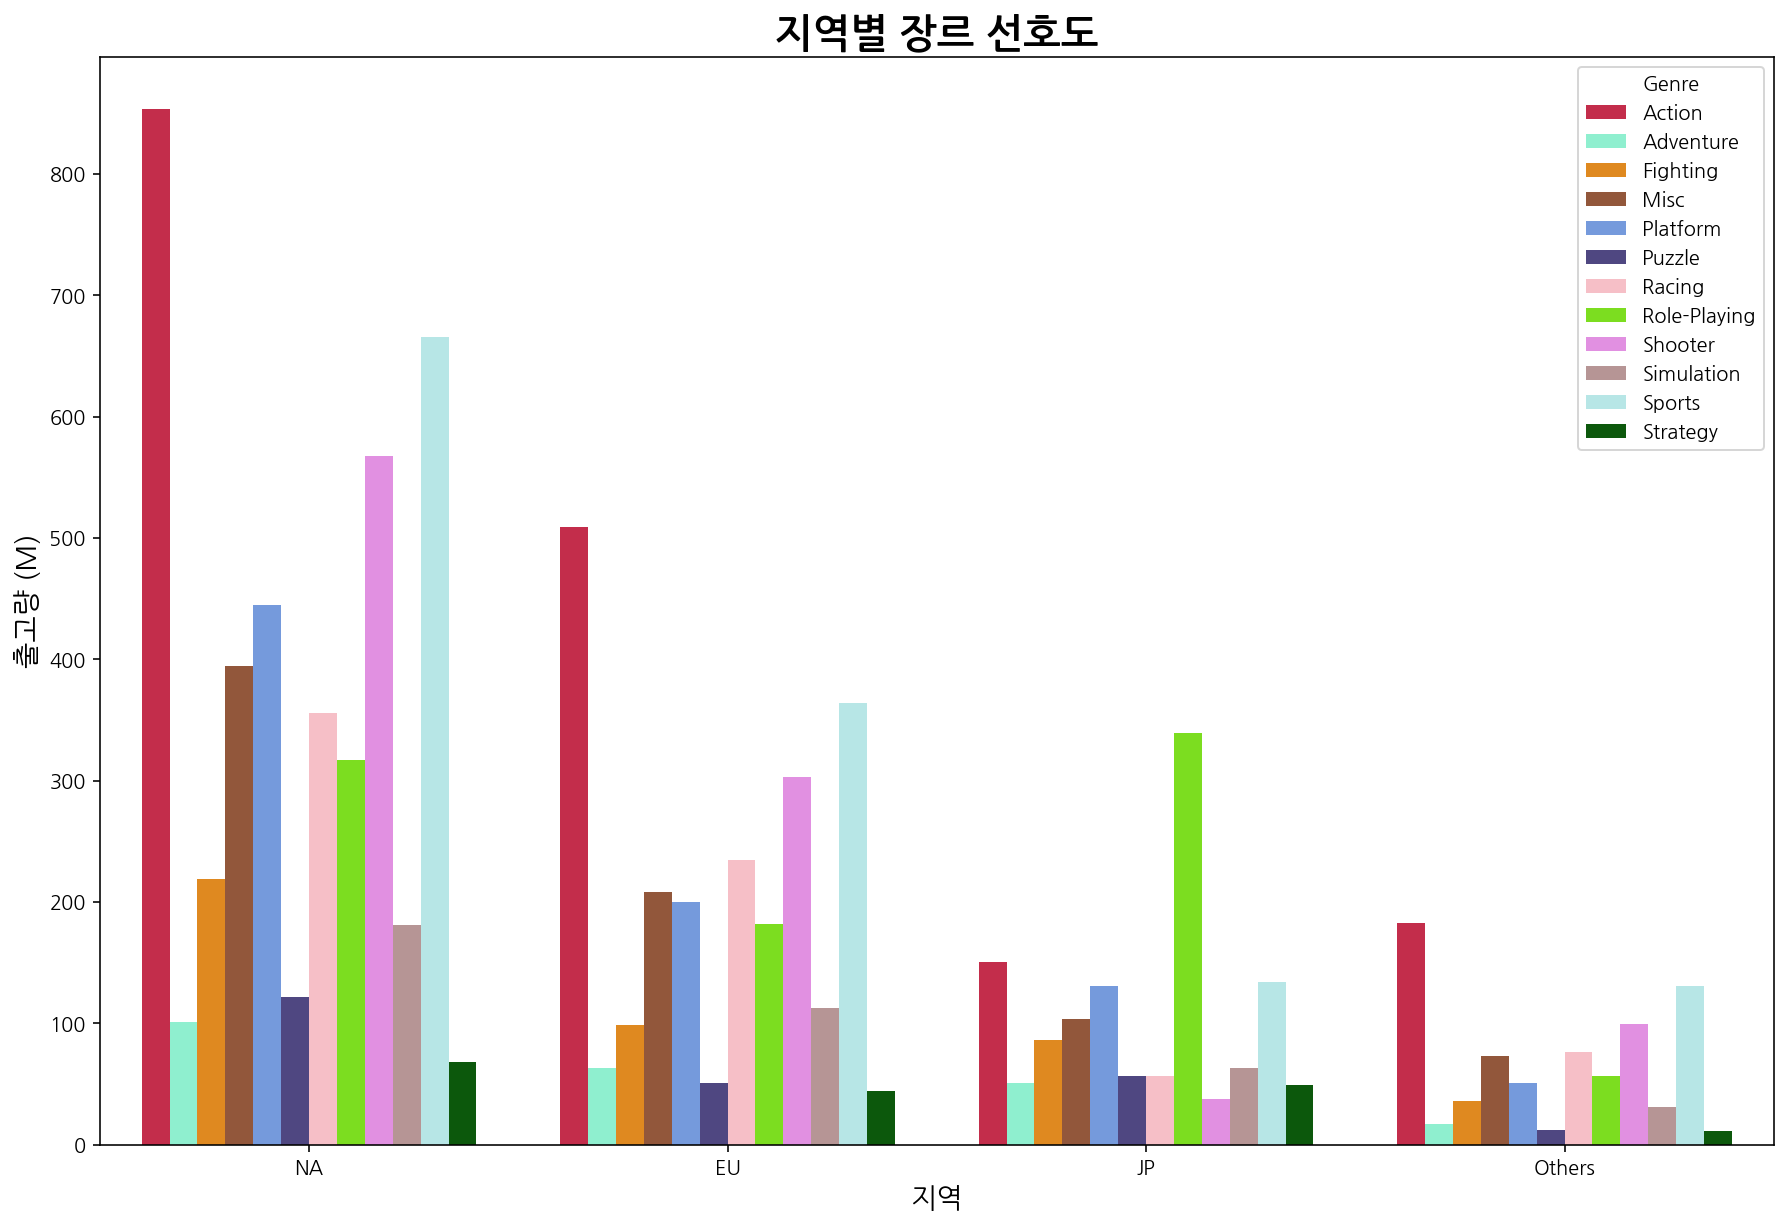

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Region', y = 'Sales', data = region_melt, hue = 'Genre', hue_order=list(genre["Genre"]), palette = genre['Color'])
plt.title('지역별 장르 선호도', fontsize=20, fontweight = 'bold')
plt.ylabel('출고량 (M)', fontsize = 14)
plt.xlabel('지역', fontsize = 14)
plt.show()

- 일본을 제외한 모든 지역에서 선호하는 게임 장르는 비슷하게 나타나고 있습니다.
  - `Action`, `Sports`, `shooter` 순서로 나타나고 있습니다.
- 일본이 선호하는 게임 장르는 다음과 같습니다.
  - `Role-Playing`, `Adventure`, `Sports` 순서로 나타나고 있습니다.

#### 일본 지역에서 선호하는 장르의 차이가 발생하는 이유
- 일본을 제외한 모든 지역에서는 비슷한 양상이 나타나고 있지만, 일본만 다른 모습을 보이고 있습니다.
- 따라서 일본 지역만의 독특한 양상이 나타나는 이유를 파악하고, 거기서 얻은 인사이트를 향후 게임 개발에 활용할 필요가 있습니다.
- 먼저 각 지역에서 출고량이 가장 많은 상위 10개의 게임을 파악했습니다.

In [ ]:
# NA
NA_top10 = game.sort_values('NA_Sales', ascending=False).head(10).reset_index(drop=True)
NA_top10_genre = NA_top10['Genre'].value_counts().reset_index()
NA_top10_genre.columns = ['Genre','Count']
NA_top10_genre['Color'] = np.nan
for i in range(len(NA_top10_genre)) :
  for j in range(len(genre)) :
    if NA_top10_genre['Genre'][i] == genre['Genre'][j] :
      NA_top10_genre['Color'][i] = genre['Color'][j]

In [ ]:
# EU
EU_top10 = game.sort_values('EU_Sales', ascending=False).head(10).reset_index(drop=True)
EU_top10_genre = EU_top10['Genre'].value_counts().reset_index()
EU_top10_genre.columns = ['Genre','Count']
EU_top10_genre['Color'] = np.nan
for i in range(len(EU_top10_genre)) :
  for j in range(len(genre)) :
    if EU_top10_genre['Genre'][i] == genre['Genre'][j] :
      EU_top10_genre['Color'][i] = genre['Color'][j]

In [ ]:
# JP
JP_top10 = game.sort_values('JP_Sales', ascending=False).head(10).reset_index(drop=True)
JP_top10_genre = JP_top10['Genre'].value_counts().reset_index()
JP_top10_genre.columns = ['Genre','Count']
JP_top10_genre['Color'] = np.nan
for i in range(len(JP_top10_genre)) :
  for j in range(len(genre)) :
    if JP_top10_genre['Genre'][i] == genre['Genre'][j] :
      JP_top10_genre['Color'][i] = genre['Color'][j]

In [ ]:
# Other
Other_top10 = game.sort_values('Other_Sales', ascending=False).head(10).reset_index(drop=True)
Other_top10_genre = Other_top10['Genre'].value_counts().reset_index()
Other_top10_genre.columns = ['Genre','Count']
Other_top10_genre['Color'] = np.nan
for i in range(len(Other_top10_genre)) :
  for j in range(len(genre)) :
    if Other_top10_genre['Genre'][i] == genre['Genre'][j] :
      Other_top10_genre['Color'][i] = genre['Color'][j]

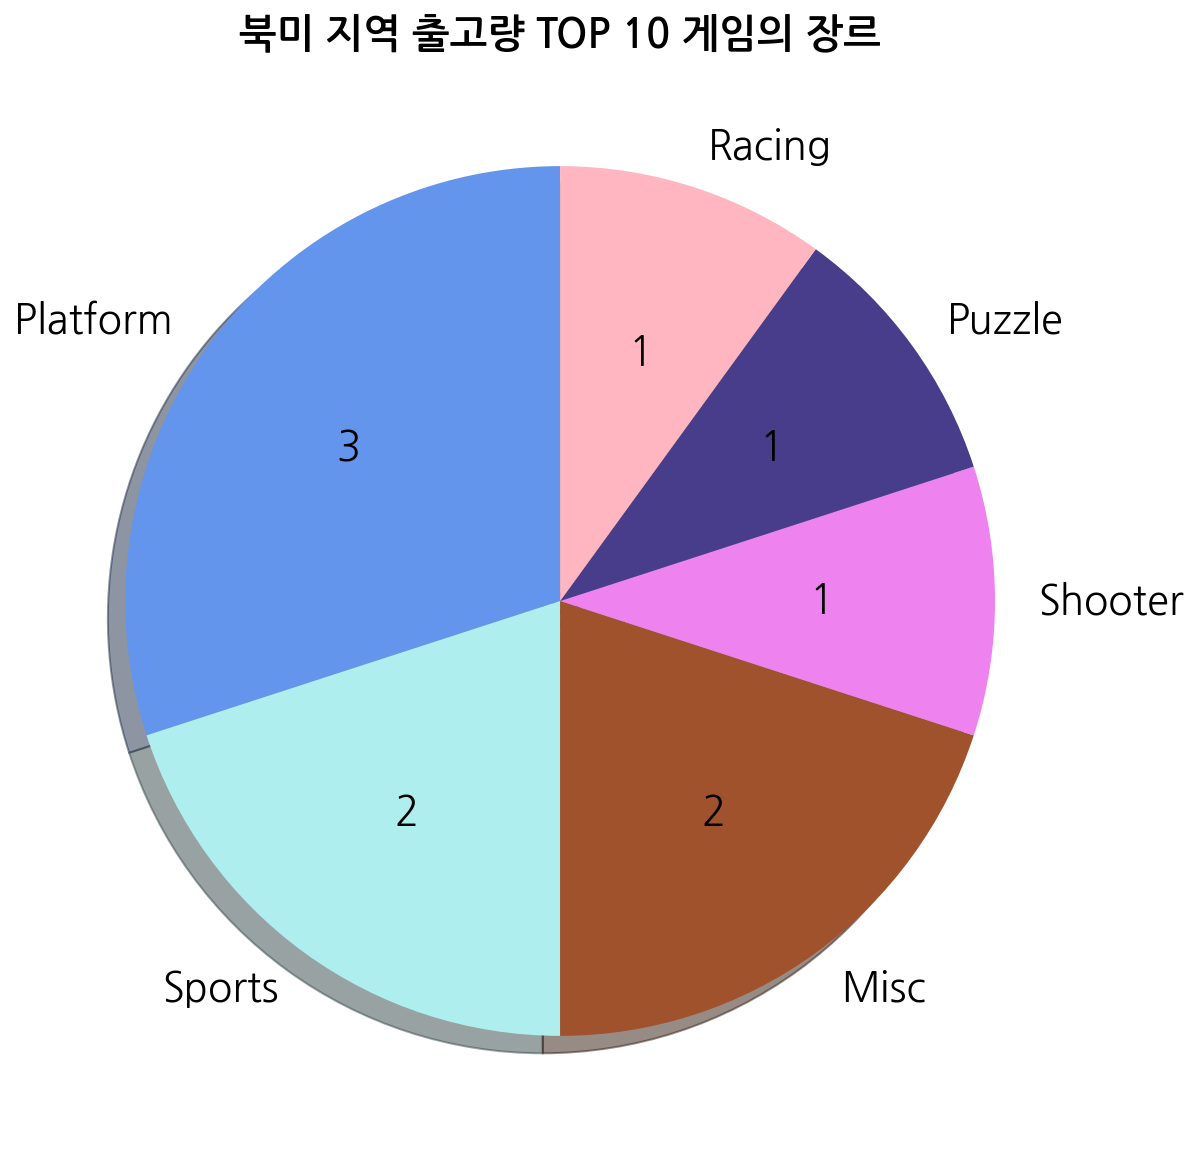

In [ ]:
def func(pct, allvals):
    absolute = pct/100*np.sum(allvals)
    return f"{round(absolute)}"

plt.figure(figsize=(15,10))

ratio = list(NA_top10_genre['Count'])
labels = list(NA_top10_genre['Genre'])
plt.pie(ratio, labels=labels, 
        autopct = lambda pct: func(pct, list(NA_top10_genre['Count'])),
        colors = NA_top10_genre['Color'],
        shadow=True,
        startangle=90,
        textprops = {'fontsize' : 20})
plt.title('북미 지역 출고량 TOP 10 게임의 장르', fontsize=20, fontweight='bold')

plt.show()

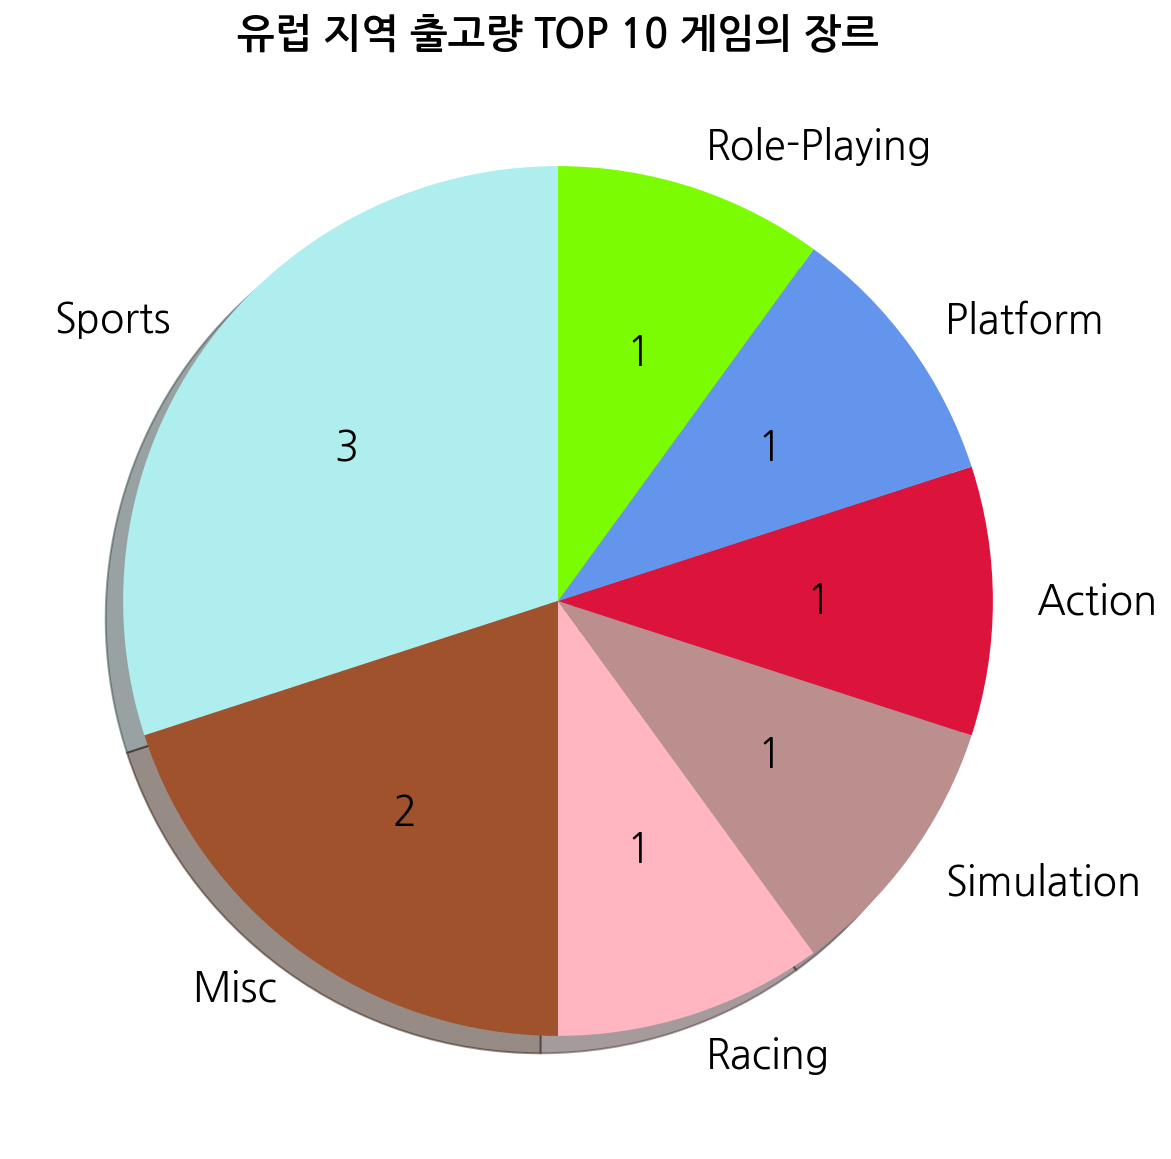

In [ ]:
def func(pct, allvals):
    absolute = pct/100*np.sum(allvals)
    return f"{round(absolute)}"

plt.figure(figsize=(15,10))

ratio = list(EU_top10_genre['Count'])
labels = list(EU_top10_genre['Genre'])
plt.pie(ratio, labels=labels, 
        autopct = lambda pct: func(pct, list(EU_top10_genre['Count'])),
        colors = EU_top10_genre['Color'],
        shadow=True,
        startangle=90,
        textprops = {'fontsize' : 20})
plt.title('유럽 지역 출고량 TOP 10 게임의 장르', fontsize=20, fontweight='bold')

plt.show()

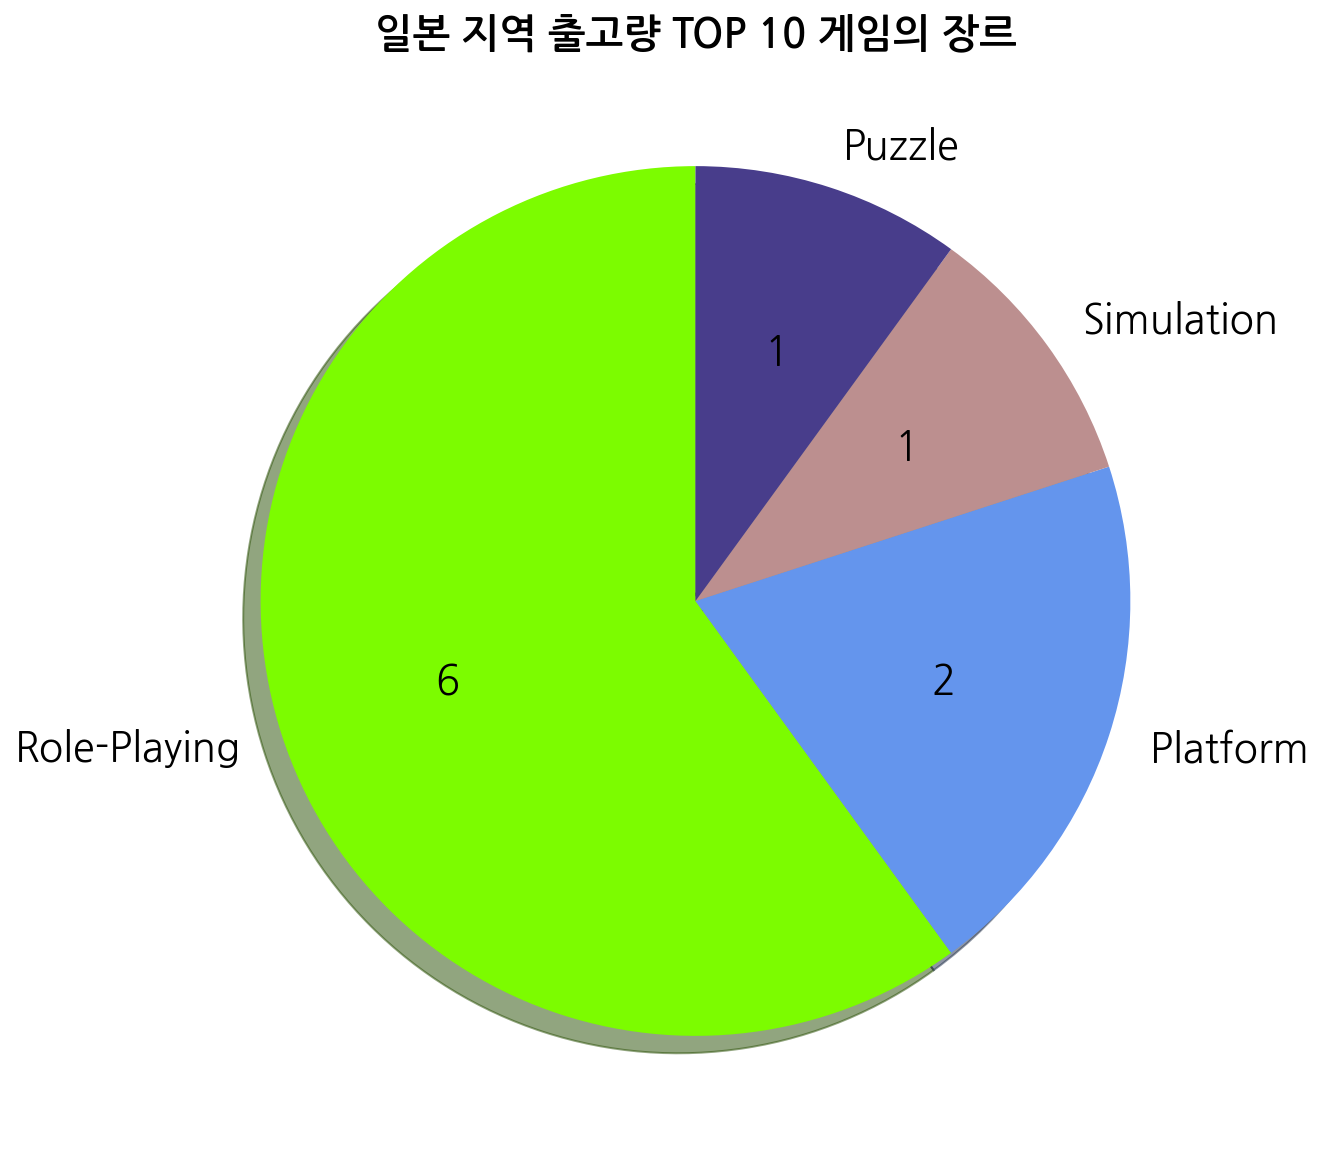

In [ ]:
def func(pct, allvals):
    absolute = pct/100*np.sum(allvals)
    return f"{round(absolute)}"

plt.figure(figsize=(15,10))

ratio = list(JP_top10_genre['Count'])
labels = list(JP_top10_genre['Genre'])
plt.pie(ratio, labels=labels, 
        autopct = lambda pct: func(pct, list(JP_top10_genre['Count'])),
        colors = JP_top10_genre['Color'],
        shadow=True,
        startangle=90,
        textprops = {'fontsize' : 20})
plt.title('일본 지역 출고량 TOP 10 게임의 장르', fontsize=20, fontweight='bold')

plt.show()

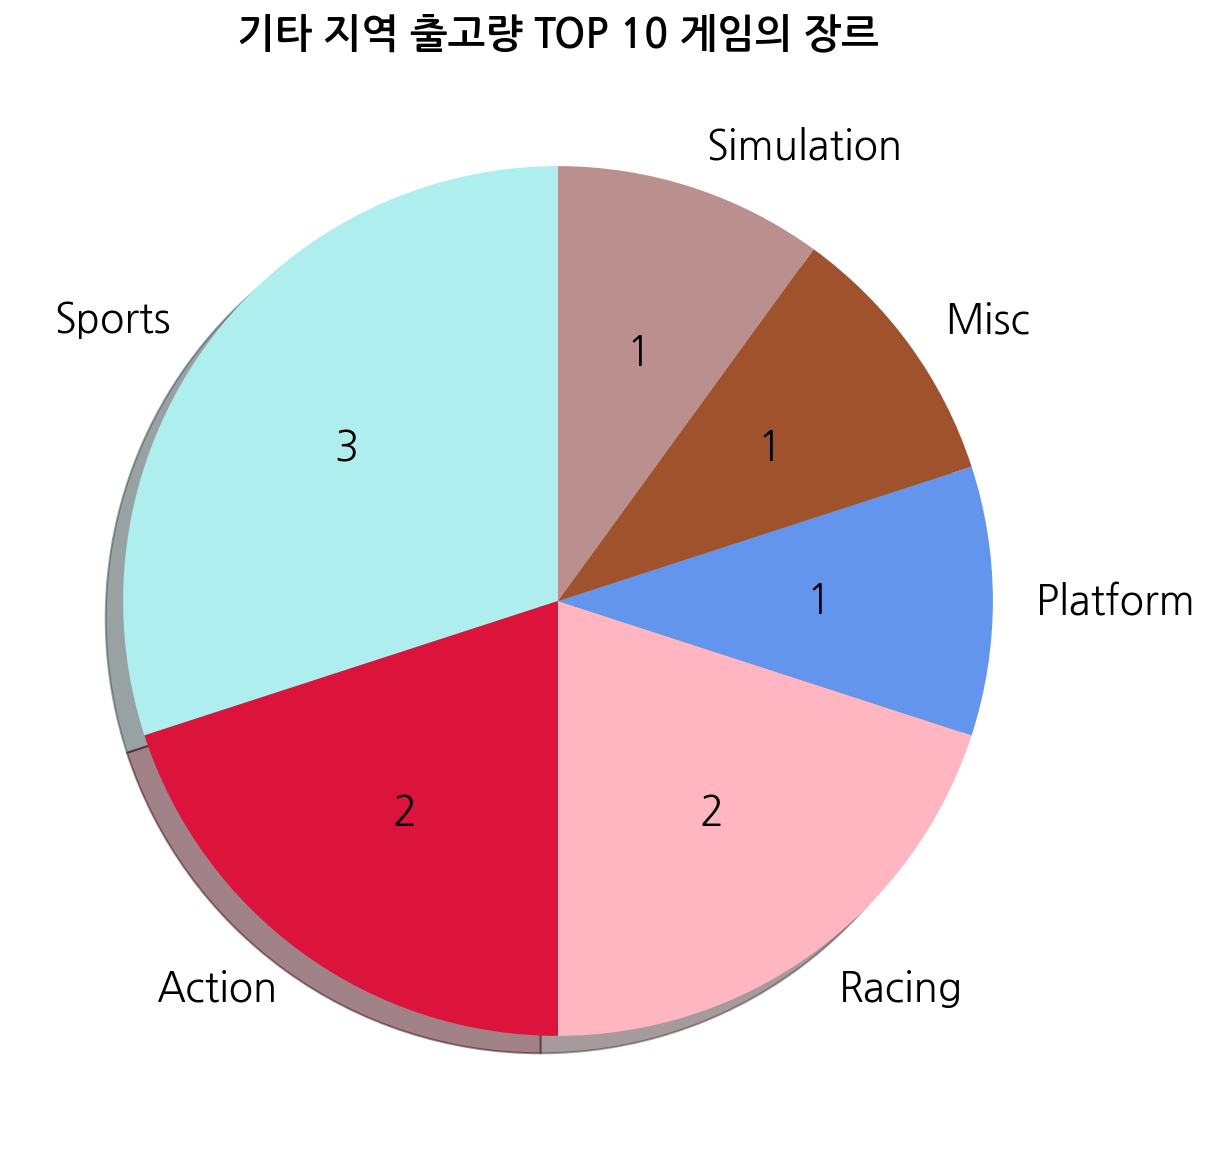

In [ ]:
def func(pct, allvals):
    absolute = pct/100*np.sum(allvals)
    return f"{round(absolute)}"

plt.figure(figsize=(15,10))

ratio = list(Other_top10_genre['Count'])
labels = list(Other_top10_genre['Genre'])
plt.pie(ratio, labels=labels, 
        autopct = lambda pct: func(pct, list(Other_top10_genre['Count'])),
        colors = Other_top10_genre['Color'],
        shadow=True,
        startangle=90,
        textprops = {'fontsize' : 20})
plt.title('기타 지역 출고량 TOP 10 게임의 장르', fontsize=20, fontweight='bold')

plt.show()

In [ ]:
region_top10 = pd.DataFrame({"NA" : NA_top10['Name'], "EU" : EU_top10['Name'], "JP" : JP_top10['Name'], "Other" : Other_top10['Name']})
region_top10

,NA,EU,JP,Other
0,Wii Sports,Wii Sports,Pokemon Red/Pokemon Blue,Grand Theft Auto: San Andreas
1,Super Mario Bros.,Mario Kart Wii,Pokemon Gold/Pokemon Silver,Wii Sports
2,Duck Hunt,Wii Sports Resort,Super Mario Bros.,Gran Turismo 4
3,Tetris,Nintendogs,New Super Mario Bros.,Grand Theft Auto V
4,Mario Kart Wii,Grand Theft Auto V,Pokemon Diamond/Pokemon Pearl,Mario Kart Wii
5,Wii Sports Resort,Brain Age: Train Your Brain in Minutes a Day,Pokemon Black/Pokemon White,Wii Sports Resort
6,Kinect Adventures!,New Super Mario Bros.,Pokemon Ruby/Pokemon Sapphire,Pro Evolution Soccer 2008
7,New Super Mario Bros. Wii,Wii Play,Animal Crossing: Wild World,New Super Mario Bros.
8,Wii Play,Pokemon Red/Pokemon Blue,Brain Age 2: More Training in Minutes a Day,Wii Play
9,Super Mario World,Wii Fit Plus,Monster Hunter Freedom 3,Nintendogs


<p align="center"> <img src='https://i.imgur.com/1C4mWHT.png' width="1000" height="600"></p>




- 다른 지역과 달리, 일본 지역에서는 `Role-Playing` 장르의 게임이 Top10에 6개나 속해 있음을 확인할 수 있습니다.  
- 또한 해당 게임들이 대부분 `Pokemon` 시리즈임을 확인할 수 있습니다.
- 이에 대한 자세한 분석은, `인기가 많은 게임에 대한 분석 및 시각화`에서 더 자세히 다루도록 하겠습니다.

## **연도별 게임의 트렌드**
- 일본 시장에서 연도별 게임 트렌드가 어떻게 변하고 있는지 파악합니다.

#### 트렌드 기준
- 트렌드의 기준은 크게 `Genre`와 `Platform_Series`로 설정했습니다.

`Genre`

In [ ]:
year = game.loc[:,['Platform_Series','Year','Genre','Publisher','JP_Sales']]
year

,Platform_Series,Year,Genre,Publisher,JP_Sales
0,Wii Series,2008,Action,Destineer,0.00
1,Wii Series,2009,Action,Namco Bandai Games,0.00
2,PS Series,2010,Adventure,Alchemist,0.02
3,Wii Series,2010,Misc,Zoo Games,0.00
4,PS Series,2010,Platform,D3Publisher,0.00
...,...,...,...,...,...
15909,Wii Series,2006,Platform,Vivendi Games,0.00
15910,PS Series,2005,Action,Rising Star Games,0.00
15911,PS Series,2015,Sports,Take-Two Interactive,0.03
15912,PS Series,2013,Action,Tecmo Koei,0.25


In [ ]:
genre_year = year.groupby(["Year",'Genre']).sum().reset_index(drop=False)
genre_year = genre_year.sort_values(['Year','Genre'])
genre_year

,Year,Genre,JP_Sales
0,1980,Action,0.00
1,1980,Fighting,0.00
2,1980,Misc,0.00
3,1980,Shooter,0.00
4,1980,Sports,0.00
...,...,...,...
370,2015,Role-Playing,6.71
371,2015,Shooter,2.69
372,2015,Simulation,1.58
373,2015,Sports,0.72


In [ ]:
genre = genre.sort_values('Genre').reset_index(drop=True)

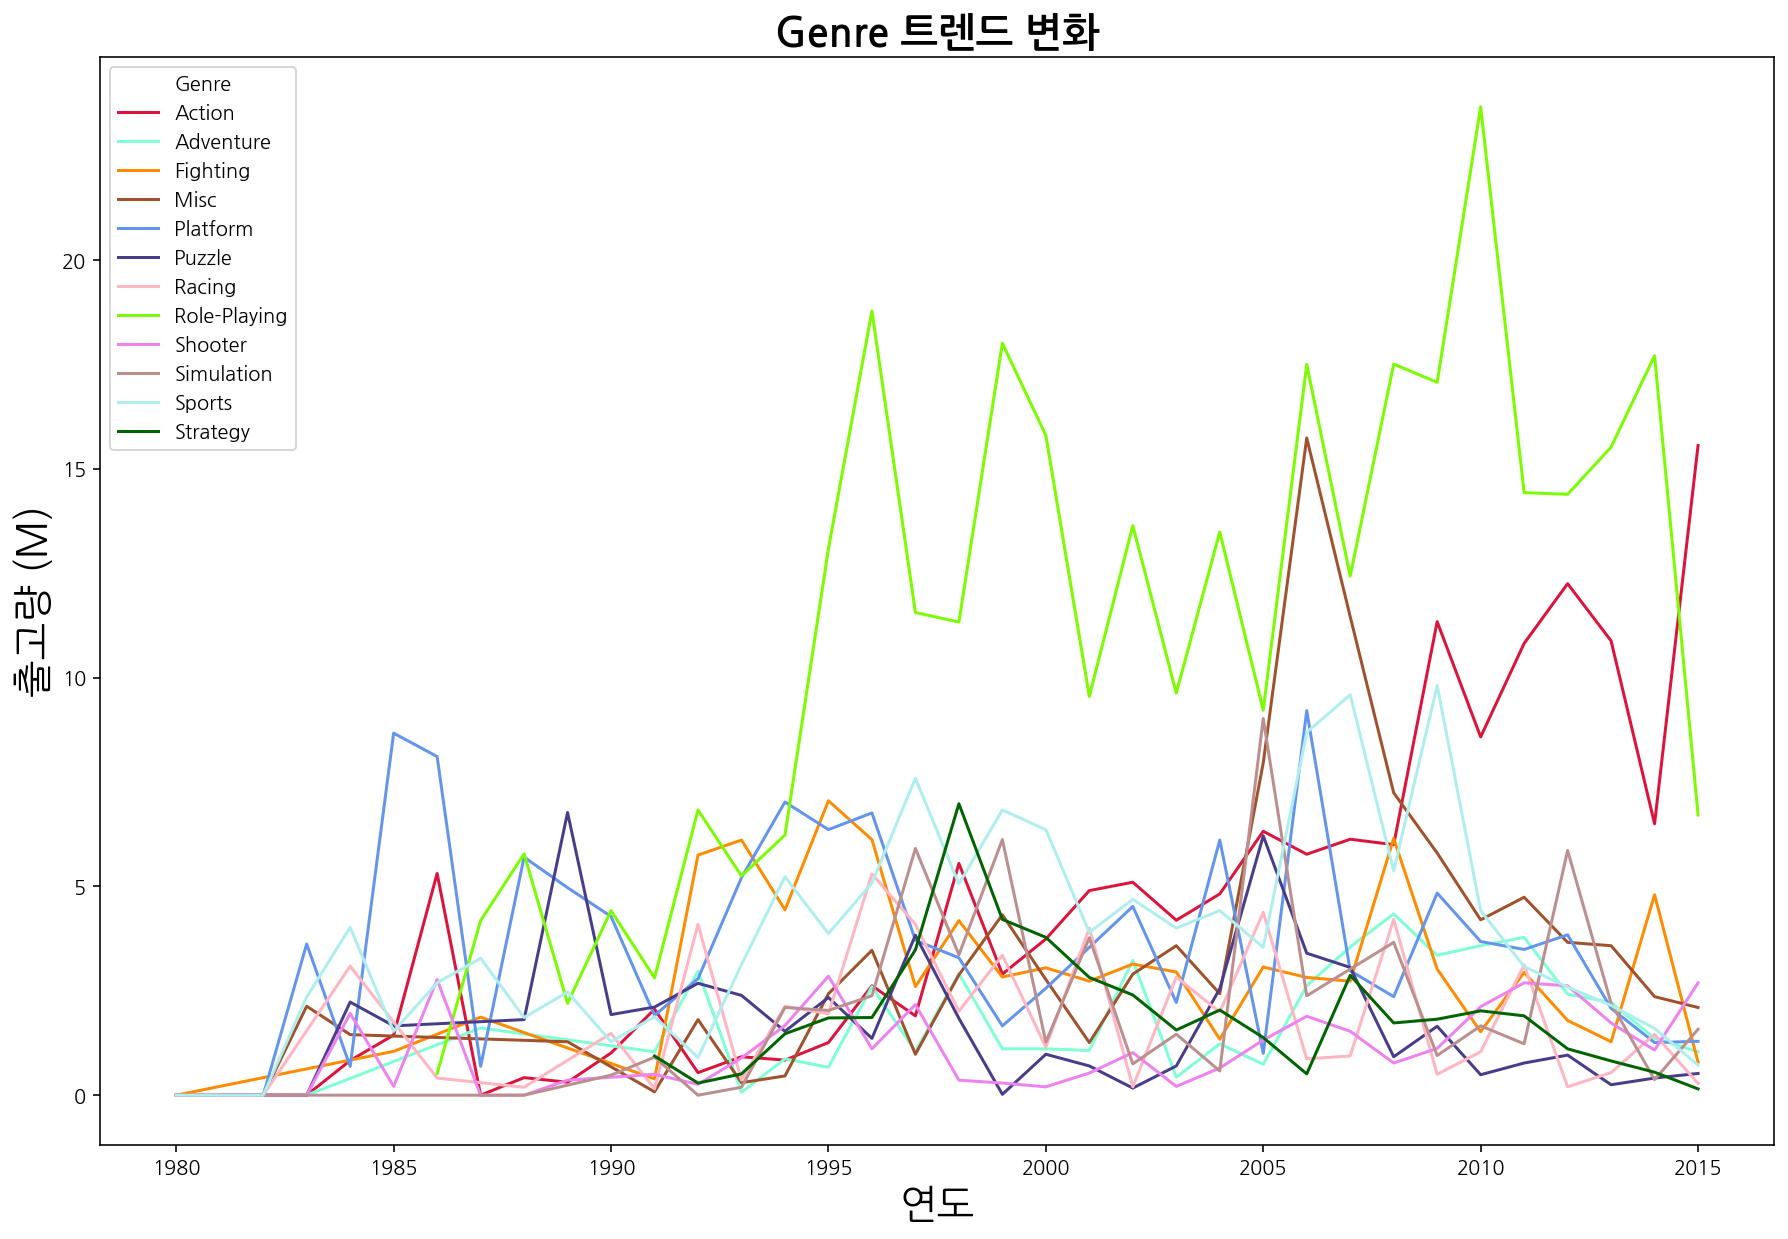

In [ ]:
plt.figure(figsize=(15,10))

sns.lineplot(data = genre_year, x = 'Year', y = 'JP_Sales', hue = 'Genre', hue_order=list(genre["Genre"]), palette = list(genre["Color"]))
plt.title('Genre 트렌드 변화', fontsize=20, fontweight = 'bold')
plt.ylabel('출고량 (M)', fontsize=20)
plt.xlabel('연도', fontsize=20)
plt.show()

- 위 시각화를 아래와 같이 표현하고 싶었으나, 시간이 부족했습니다.

<p align="center"> <img src='https://i.imgur.com/ScqM51d.png'></p>


`Platform_Series`

In [ ]:
platform_year = year.groupby(["Year",'Platform_Series']).sum().reset_index(drop=False)
platform_year = platform_year[['Year','Platform_Series','JP_Sales']]
platform_series_year = platform_year.groupby(['Year','Platform_Series']).sum().reset_index(drop=False)

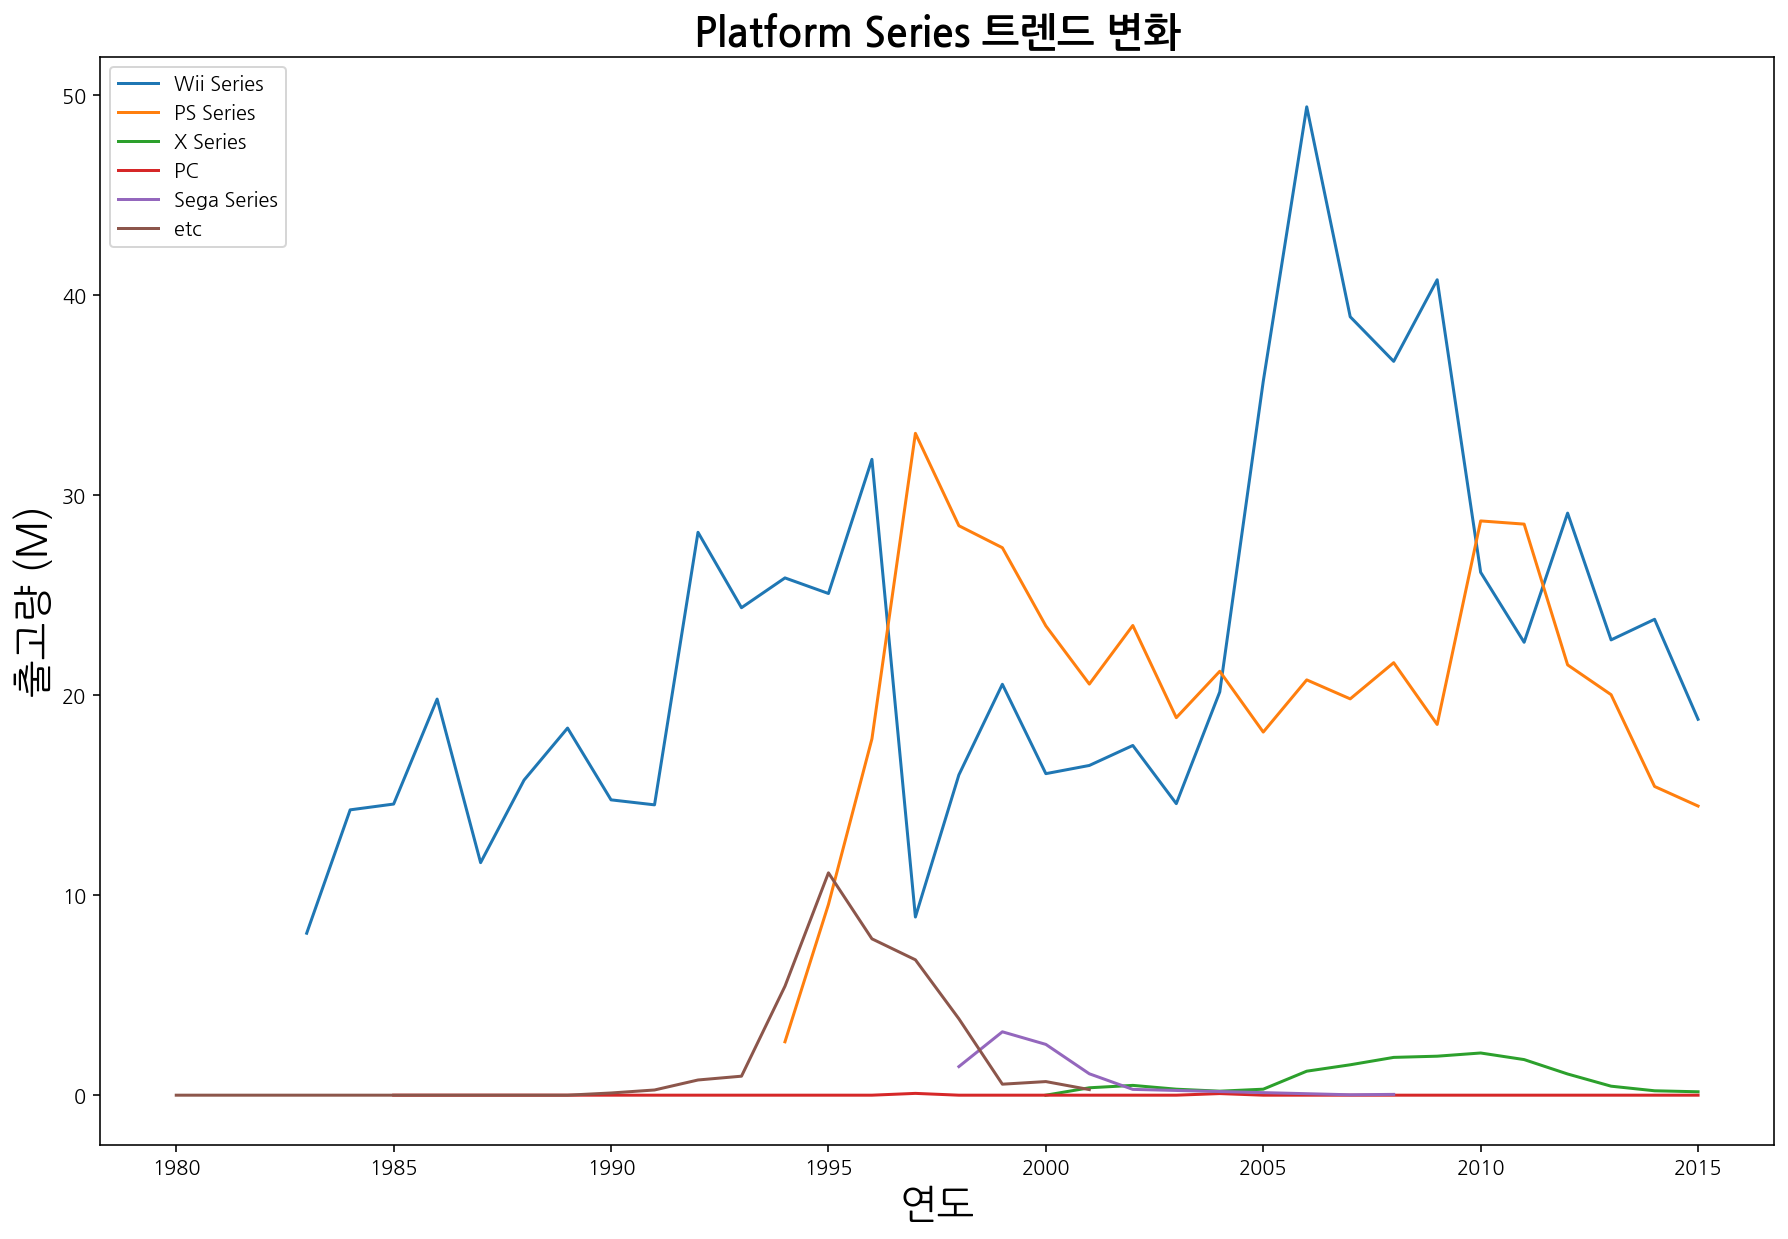

In [ ]:
plt.figure(figsize=(15,10))

sns.lineplot(data = platform_series_year, x = 'Year', y = 'JP_Sales', hue = 'Platform_Series',
             hue_order=['Wii Series', 'PS Series', 'X Series','PC','Sega Series','etc'])
plt.title('Platform Series 트렌드 변화', fontsize=20, fontweight = 'bold')
plt.ylabel('출고량 (M)', fontsize=20)
plt.xlabel('연도', fontsize=20)
plt.legend(loc = 'upper left')
plt.show()

#### 연도별 트렌드
- 일본 지역에서는 다음과 같은 이유로 인해 트랜드가 존재합니다.
  - 출고량 비율이 압도적인 게임 장르나 플랫폼이 존재합니다.
  - 최근 그 추세의 변화폭이 크게 나타나고 있습니다.
- `Genre`
  - 수년 간 `Role-Playing` 장르가 가장 높은 출고량 비율을 보유하고 있었습니다.
  - 최근 `Role-Playing` 장르의 출고량이 급감하는 반면, `Action` 장르의 출고량은 급증하고 있습니다.
  - 모든 장르가 출고량이 계속 성장하는 모습 보다는, 증가와 감소가 반복적으로 나타나는 모습을 보인다. 
- `Platform`
  - `PS, Wii Series`가 다른 플랫폼에 항상 출고량이 압도적으로 높습니다.

## **인기가 많은 게임에 대한 분석 및 시각화**


#### 인기가 많다는 것의 정의
- 인기 순위를 **출고량**으로 정의해서 상위 20개의 게임들을 살펴보았습니다.

In [ ]:
japan = game.sort_values('JP_Sales', ascending=False)
japan = japan.loc[:, ["Name","Year", 'Platform_Series','Genre','Publisher','JP_Sales']]
japan = japan.reset_index(drop=True)
japan.head(20)

,Name,Year,Platform_Series,Genre,Publisher,JP_Sales
0,Pokemon Red/Pokemon Blue,1996,Wii Series,Role-Playing,Nintendo,10.22
1,Pokemon Gold/Pokemon Silver,1999,Wii Series,Role-Playing,Nintendo,7.20
2,Super Mario Bros.,1985,Wii Series,Platform,Nintendo,6.81
3,New Super Mario Bros.,2006,Wii Series,Platform,Nintendo,6.50
4,Pokemon Diamond/Pokemon Pearl,2006,Wii Series,Role-Playing,Nintendo,6.04
5,Pokemon Black/Pokemon White,2010,Wii Series,Role-Playing,Nintendo,5.65
6,Pokemon Ruby/Pokemon Sapphire,2002,Wii Series,Role-Playing,Nintendo,5.38
7,Animal Crossing: Wild World,2005,Wii Series,Simulation,Nintendo,5.33
8,Brain Age 2: More Training in Minutes a Day,2005,Wii Series,Puzzle,Nintendo,5.32
9,Monster Hunter Freedom 3,2010,PS Series,Role-Playing,Capcom,4.87


#### 인기 많은 게임 분석
- 가장 상위의 게임들은 1900년대 후반에 나온 옛날 게임에 속합니다.
- 그런데 동일한 작품 시리즈(포켓몬, 마리오)들이 계속해서 출고량이 높게 나타나 출고량 상위 20 게임에 속하는 것을 확인할 수 있습니다.
- 현지에서 개발한 게임이 인기를 지속하고 있습니다.
- 첫 번째 게임 시리즈의 흥행으로 **강력한 캐릭터성**을 구축한 작품들이, 다음 시리즈에서도 계속해서 흥행하는 모습을 보이고 있습니다.

### 논의점
현실적으로, 현재 일본 지역에서 상위권을 차지하고 있는 게임과 동일한 방식의 게임을 설계하는 것은 불가능합니다. 이유는 다음과 같습니다.
- 닌텐도 배급사가 가진 IP를 한국 게임사가 개발할 수 없습니다.
- 일본이 현지에서 개발한 게임이 인기를 지속하는 시장이라면, 진입하기 어렵다고 생각이 듭니다.
</br>

추가 분석 수행
- 그러나 기업의 비전 목표의 시작인 만큼, 회사 측에서는 어떻게든 한 번 시도해보라는 압력이 왔습니다. 
- 동일한 시리즈의 게임이 모두 상위권에 존재한다면, 이제까지 수행한 분석 결과가 해당 시리즈만 묘사하고 있을 가능성이 높습니다.
- 따라서 해당 게임 시리즈(포켓몬, 마리오)를 제외하고 다시 한 번 분석을 수행했습니다.

In [ ]:
# 포켓몬 시리즈, 마리오 시리즈를 제외한 게임 목록을 생성합니다.
major_series = japan[japan["Name"].str.contains('Pokemon') | japan["Name"].str.contains('Pokémon') | japan["Name"].str.contains('Mario')].index
japan_major_rm = japan.drop(major_series, axis=0).reset_index(drop=True)

In [ ]:
japan_major_rm.head(20)

,Name,Year,Platform_Series,Genre,Publisher,JP_Sales
0,Animal Crossing: Wild World,2005,Wii Series,Simulation,Nintendo,5.33
1,Brain Age 2: More Training in Minutes a Day,2005,Wii Series,Puzzle,Nintendo,5.32
2,Monster Hunter Freedom 3,2010,PS Series,Role-Playing,Capcom,4.87
3,Animal Crossing: New Leaf,2012,Wii Series,Simulation,Nintendo,4.36
4,Dragon Quest IX: Sentinels of the Starry Skies,2009,Wii Series,Role-Playing,Nintendo,4.35
5,Tetris,1989,Wii Series,Puzzle,Nintendo,4.22
6,Brain Age: Train Your Brain in Minutes a Day,2005,Wii Series,Misc,Nintendo,4.16
7,Monster Hunter Freedom Unite,2008,PS Series,Role-Playing,Capcom,4.13
8,Dragon Quest VII: Warriors of Eden,2000,PS Series,Role-Playing,Enix Corporation,4.10
9,Dragon Warrior III,1988,Wii Series,Role-Playing,Enix Corporation,3.77


In [ ]:
japan_major_rm_genre = japan_major_rm.groupby('Genre')['JP_Sales'].sum().reset_index(drop=False)
japan_major_rm_genre['Color'] = genre['Color']
japan_major_rm_genre['x'] = 1

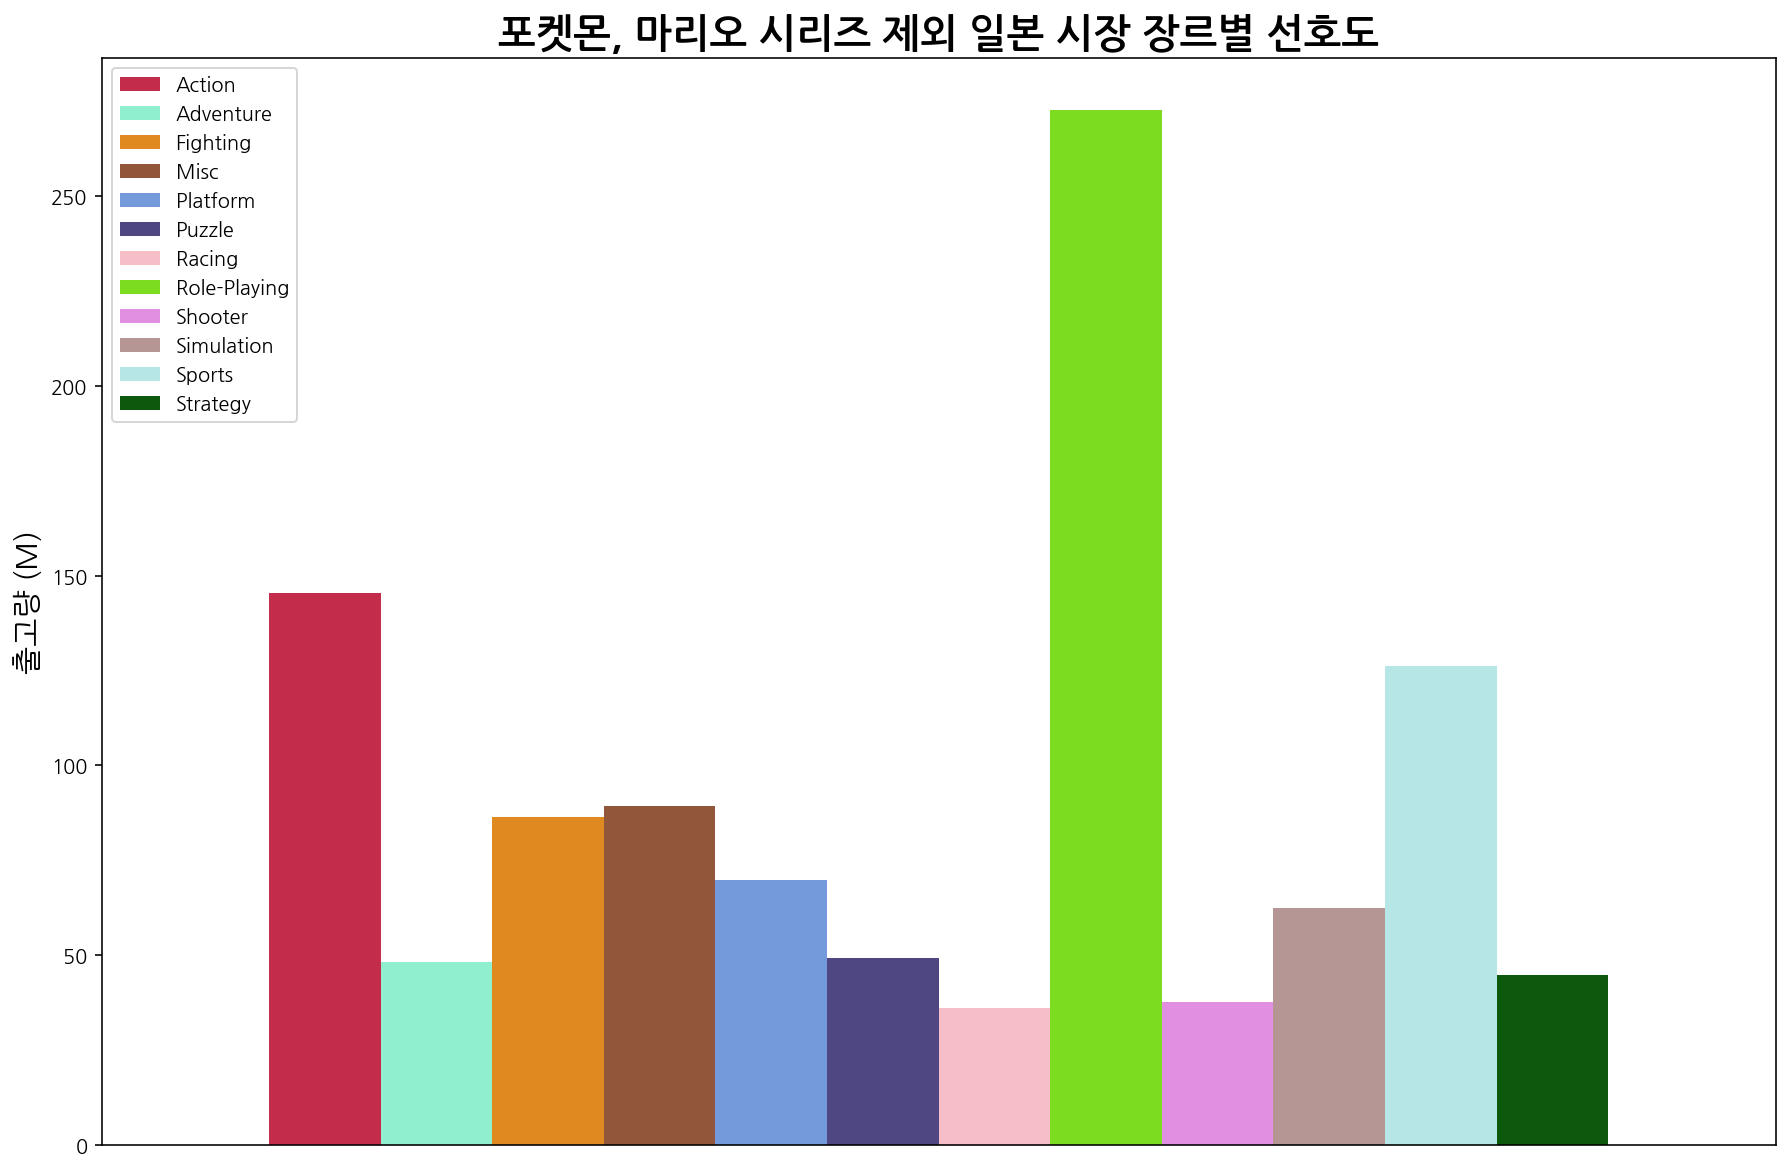

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'x', y = 'JP_Sales', data = japan_major_rm_genre, hue = 'Genre', palette = japan_major_rm_genre['Color'], ci=False)
plt.title('포켓몬, 마리오 시리즈 제외 일본 시장 장르별 선호도', fontsize=20, fontweight = 'bold')
plt.ylabel('출고량 (M)', fontsize = 15)
plt.gca().axes.xaxis.set_visible(False)
plt.legend(loc = 'upper left')
plt.show()

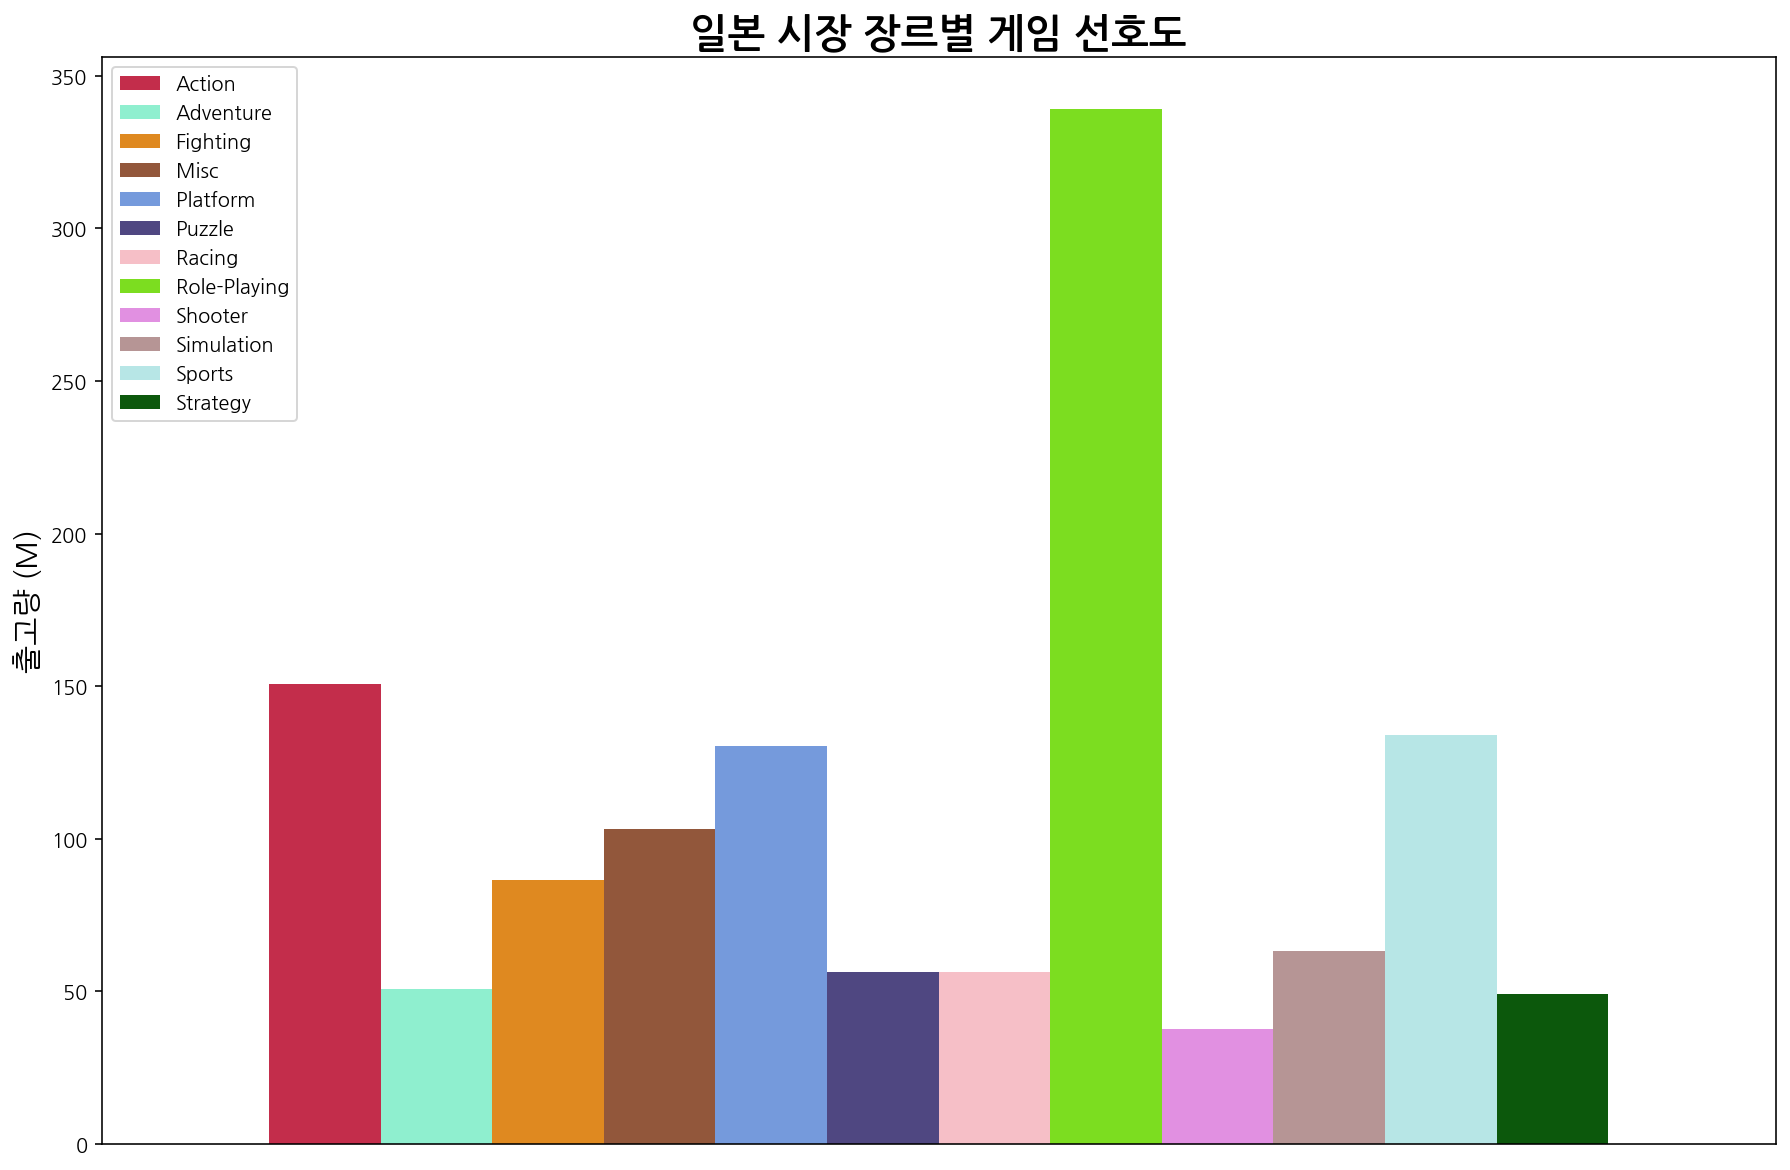

In [ ]:
jp_genre = region_melt.query("Region == 'JP'").reset_index(drop=True)
jp_genre['Color'] = genre['Color']
jp_genre['x'] = 1

plt.figure(figsize=(15,10))
sns.barplot(x = 'x', y = 'Sales', data = jp_genre, hue = 'Genre', palette = jp_genre['Color'])
plt.title('일본 시장 장르별 게임 선호도', fontsize=20, fontweight = 'bold')
plt.ylabel('출고량 (M)', fontsize = 15)
plt.gca().axes.xaxis.set_visible(False)
plt.legend(loc = 'upper left')
plt.show()

- 포켓몬, 마리오 시리즈를 제외하지 않은 경우와 비교해도, 여전히 `Role-Playing` 게임을 선호하고 있음을 알 수 있습니다.


계속해서 연도별 트렌드도 확인해보겠습니다.

In [ ]:
japan_major_rm_genre_year = japan_major_rm.groupby(['Year', 'Genre'])['JP_Sales'].sum().reset_index(drop=False)
japan_major_rm_platform_series_year = japan_major_rm.groupby(['Year', 'Platform_Series'])['JP_Sales'].sum().reset_index(drop=False)

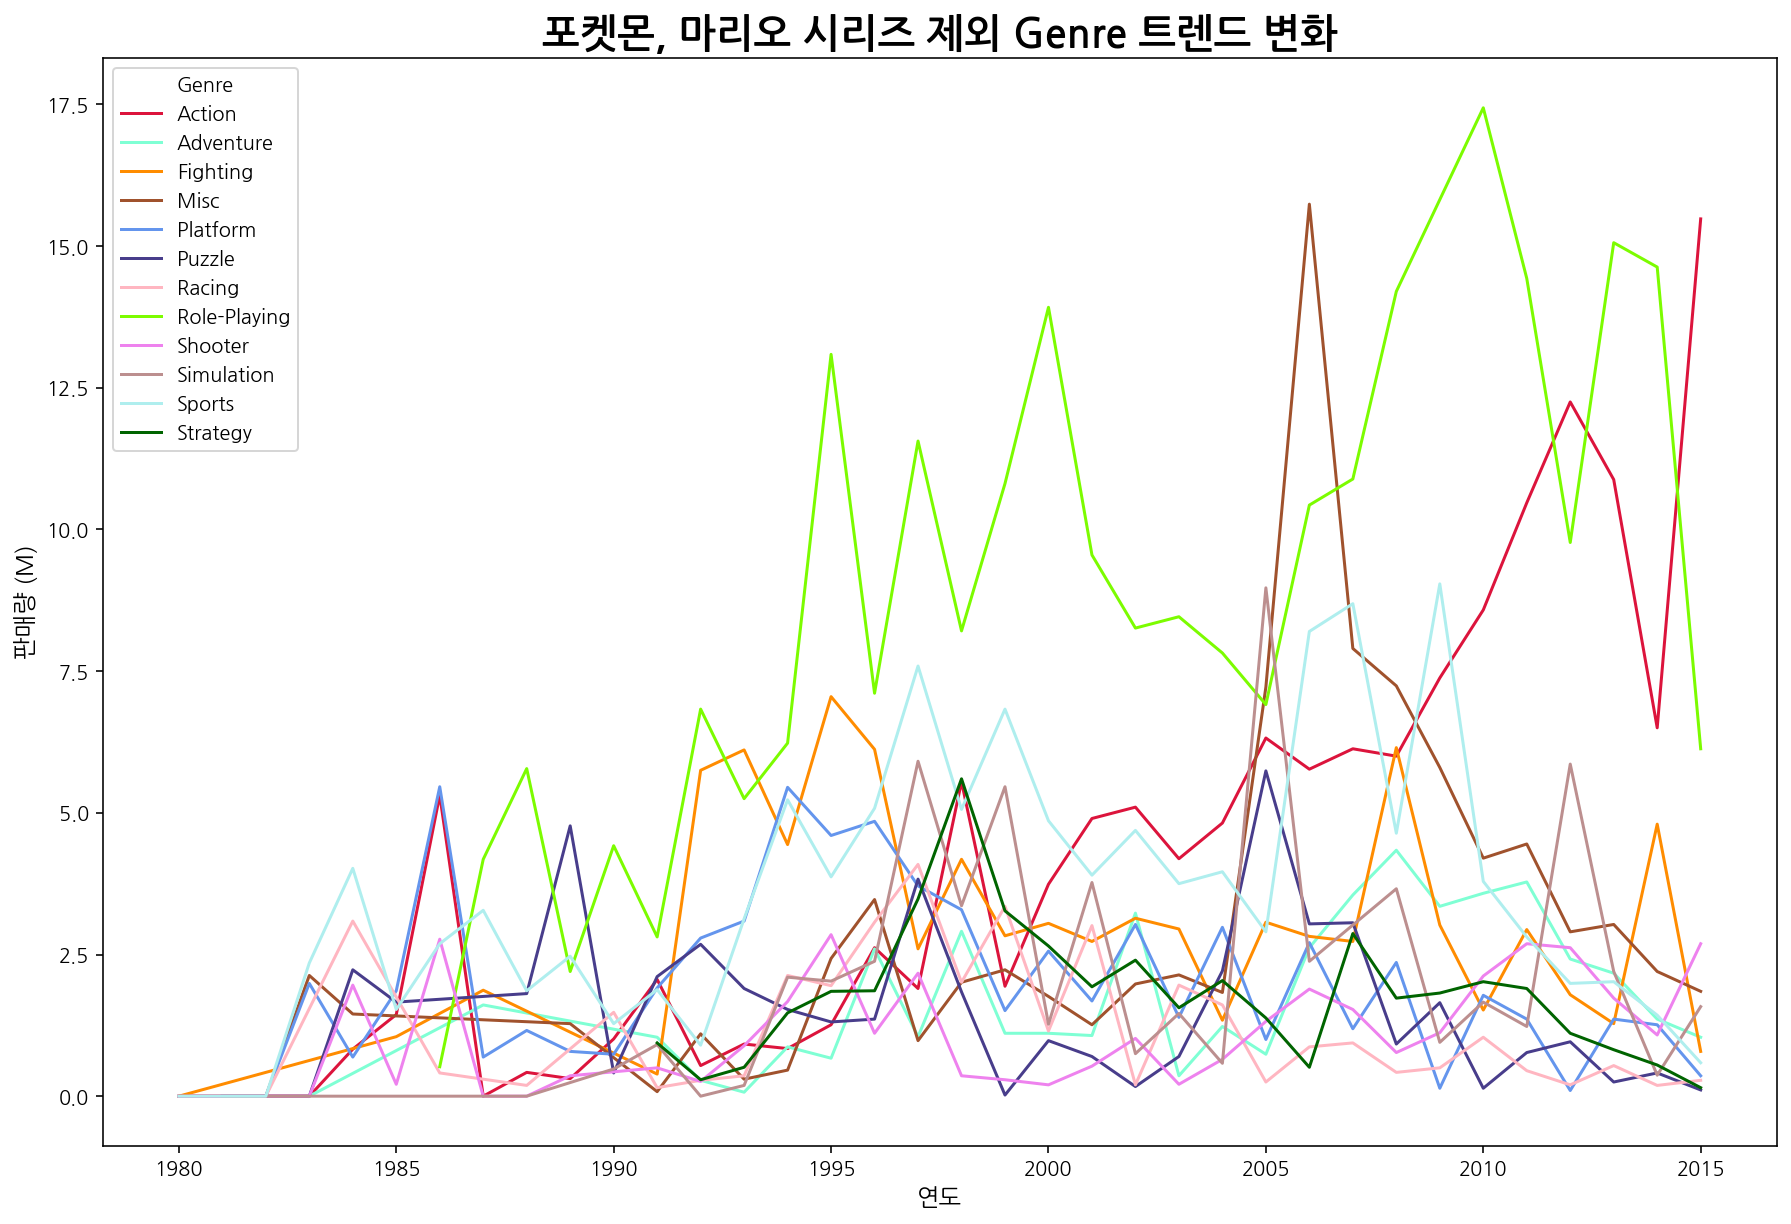

In [ ]:
plt.figure(figsize=(15,10))

sns.lineplot(data = japan_major_rm_genre_year, x = 'Year', y = 'JP_Sales', hue = 'Genre', hue_order=list(genre["Genre"]), palette = list(genre["Color"]))
plt.title('포켓몬, 마리오 시리즈 제외 Genre 트렌드 변화', fontsize=20, fontweight = 'bold')
plt.ylabel('판매량 (M)', fontsize=12)
plt.xlabel('연도', fontsize=12)
plt.show()

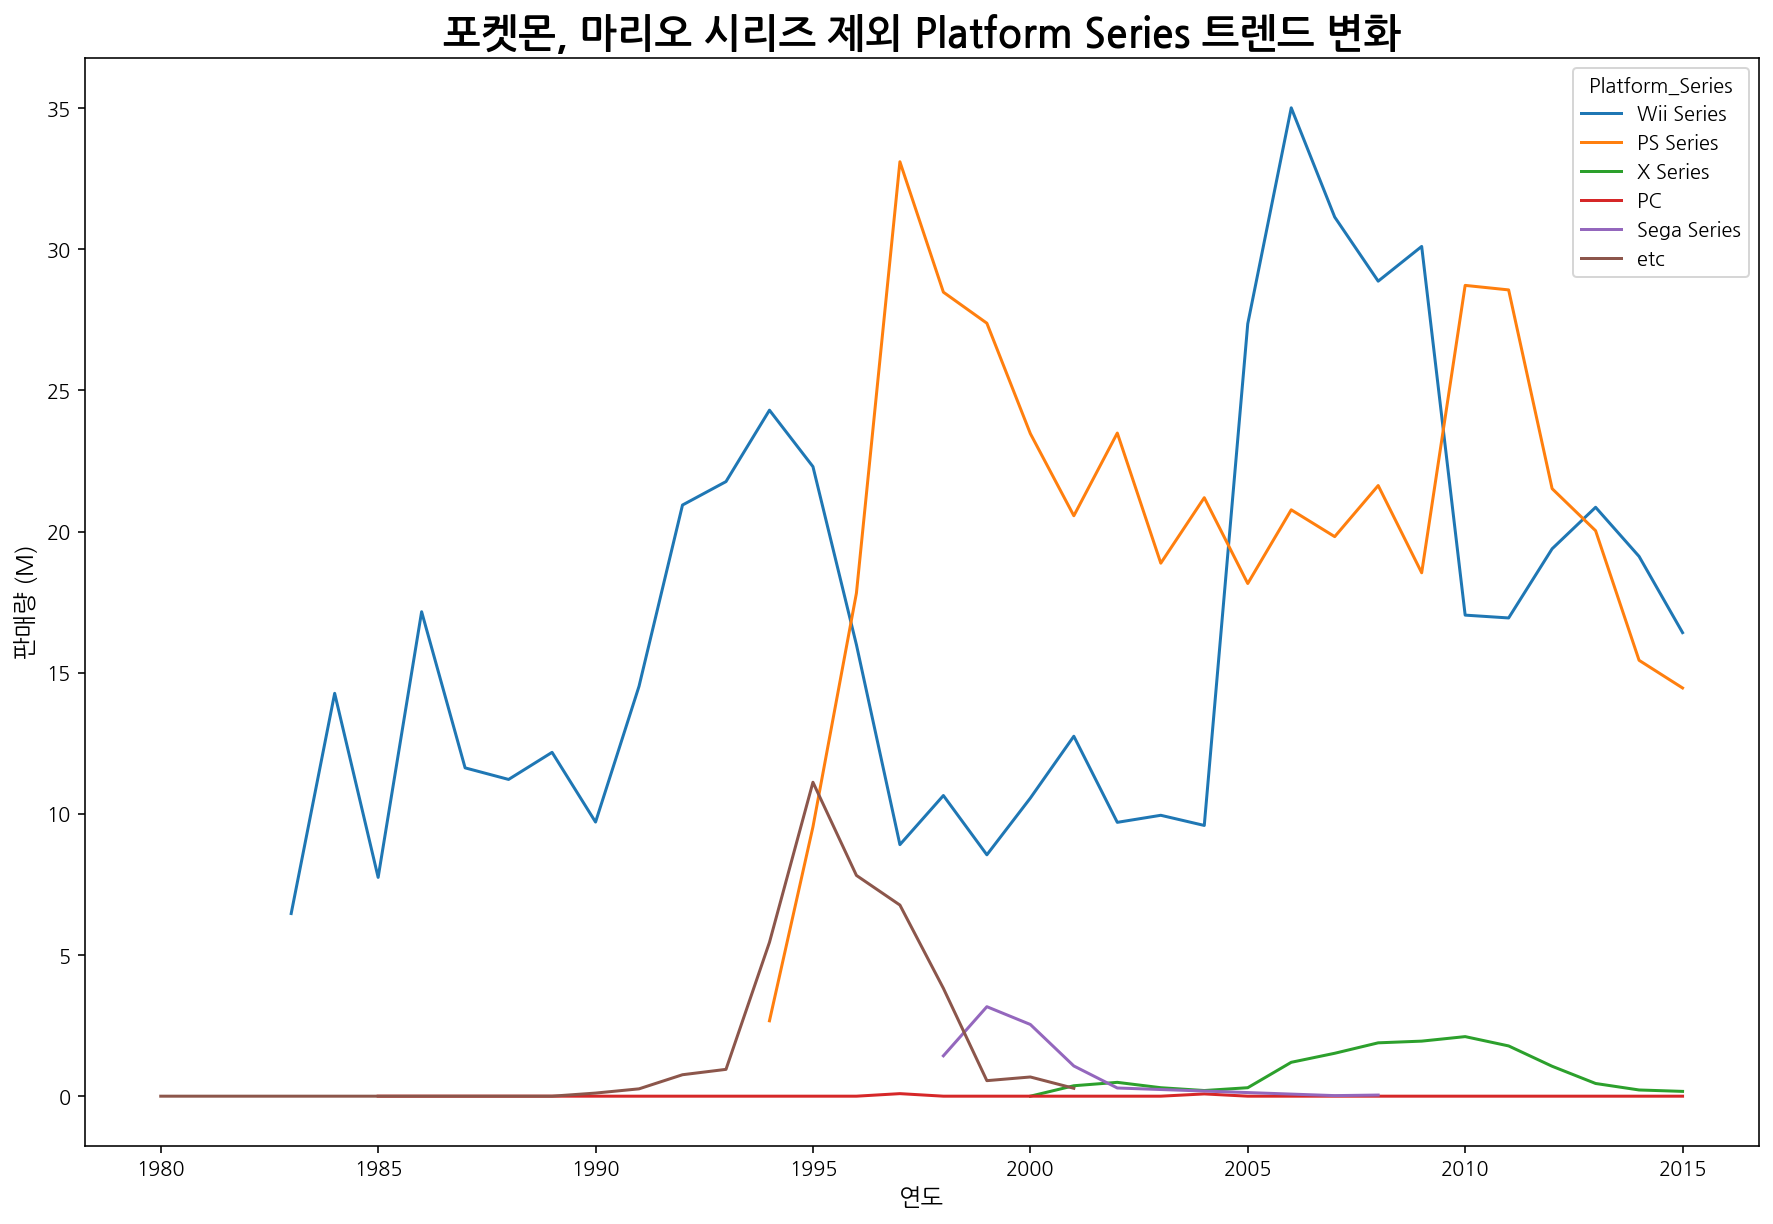

In [ ]:
plt.figure(figsize=(15,10))

sns.lineplot(data = japan_major_rm_platform_series_year, x = 'Year', y = 'JP_Sales', hue = 'Platform_Series',
             hue_order=['Wii Series', 'PS Series', 'X Series','PC','Sega Series','etc'])
plt.title('포켓몬, 마리오 시리즈 제외 Platform Series 트렌드 변화', fontsize=20, fontweight = 'bold')
plt.ylabel('판매량 (M)', fontsize=12)
plt.xlabel('연도', fontsize=12)
plt.show()

- 역시나 앞선 결과와 마찬가지로, 포켓몬, 마리오 시리즈를 제거하더라도 연도별 트렌드의 큰 변화가 없었습니다.

### 분석 결과
- 유명 시리즈들을 제외하더라도, 다음과 같이 이전과 비슷한 양상이 나타나고 있습니다.
  - 플랫폼 : Wii Series, PS Series
  - 장르 : Role-Playing, Action
- **따라서 게임을 설계할 경우, 해당 게임이 `Wii Series`와 `PS Series`로 구동 가능하는 게 설계하는 것이 중요합니다.**
- **게임의 장르는 `Role-Playing`과 `Action`이 좋다고 판단됩니다.**

## **예상 출고량 분석**
- 하지만 우리 부서에는 게임을 두 종류나 설계할 만큼의 자원이 주어지지 않았습니다. 따라서 추가적인 분석을 통해 두 장르 중 어느 장르의 게임을 설계할 지 선택해야 합니다.
  - 현실적으로는 게임 장르에 따라 개발 비용이 다르지만, 현재 시나리오에서는 동일하다고 생각해봅시다.
  - 따라서 예상 출고량 하나만 고려하여 게임의 장르는 선택하기로 합니다.

#### 시각적 파악

In [ ]:
japan_sales = japan.groupby('Genre')['JP_Sales'].mean().reset_index(drop=False)
japan_major_rm_sales = japan_major_rm.groupby('Genre')['JP_Sales'].mean().reset_index(drop=False)

In [ ]:
japan_sales

,Genre,JP_Sales
0,Action,0.048259
1,Adventure,0.041205
2,Fighting,0.105243
3,Misc,0.062121
4,Platform,0.150949
5,Puzzle,0.099364
6,Racing,0.046847
7,Role-Playing,0.238412
8,Shooter,0.030056
9,Simulation,0.075556


In [ ]:
japan_major_rm_sales

,Genre,JP_Sales
0,Action,0.046622
1,Adventure,0.039028
2,Fighting,0.105243
3,Misc,0.054558
4,Platform,0.084043
5,Puzzle,0.089582
6,Racing,0.030319
7,Role-Playing,0.196484
8,Shooter,0.030056
9,Simulation,0.074886


In [ ]:
japan_sales['Color'] = genre['Color']
japan_sales['x'] = 1
japan_major_rm_sales['Color'] = genre['Color']
japan_major_rm_sales['x'] = 1

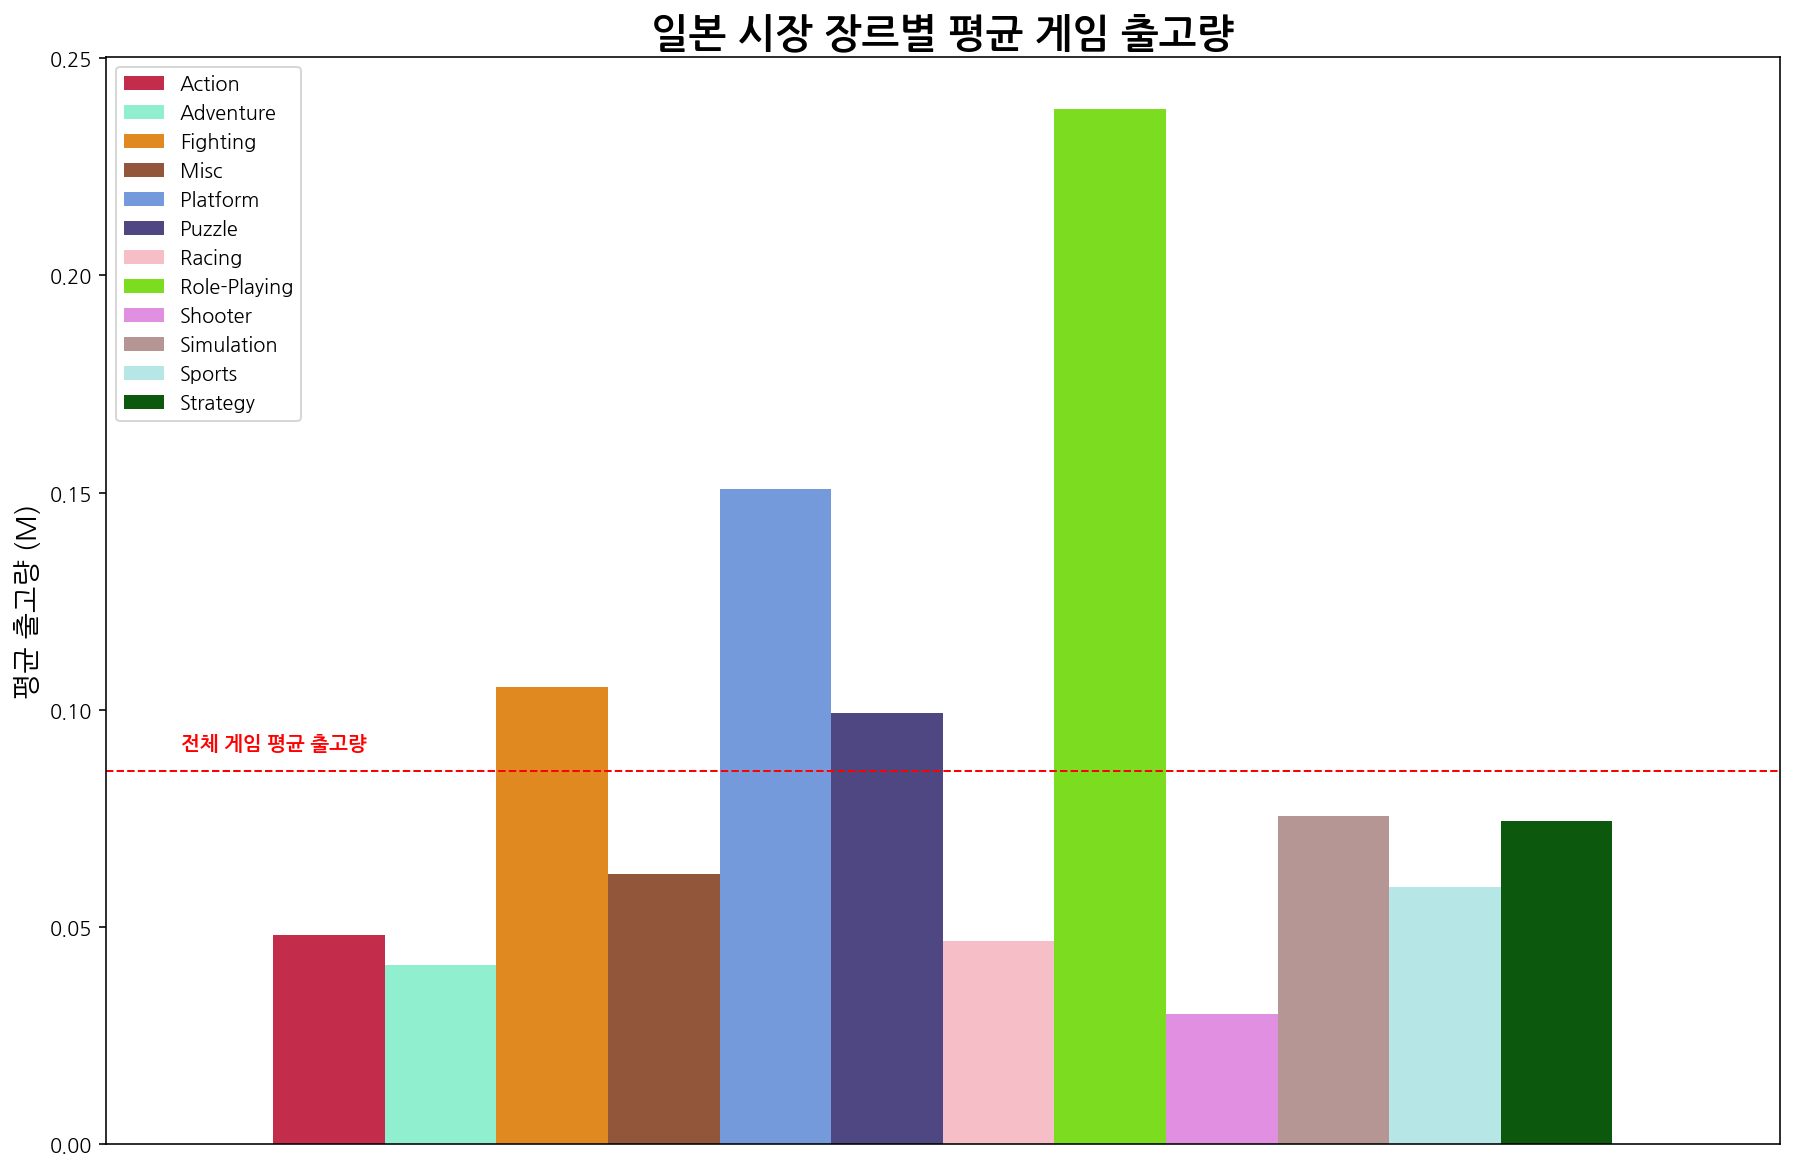

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'x', y = 'JP_Sales', data = japan_sales, hue = 'Genre', palette = japan_sales['Color'], ci=False)
plt.title('일본 시장 장르별 평균 게임 출고량', fontsize=20, fontweight = 'bold')
plt.ylabel('평균 출고량 (M)', fontsize = 14)
plt.axhline(y=japan_sales['JP_Sales'].mean(), linestyle = '--', color ='r', linewidth=1)
plt.gca().axes.xaxis.set_visible(False)
plt.text(-0.455, japan_sales['JP_Sales'].mean()+ 0.005, '전체 게임 평균 출고량', color = 'r', weight = 'bold')
plt.legend(loc = 'upper left')
plt.show()

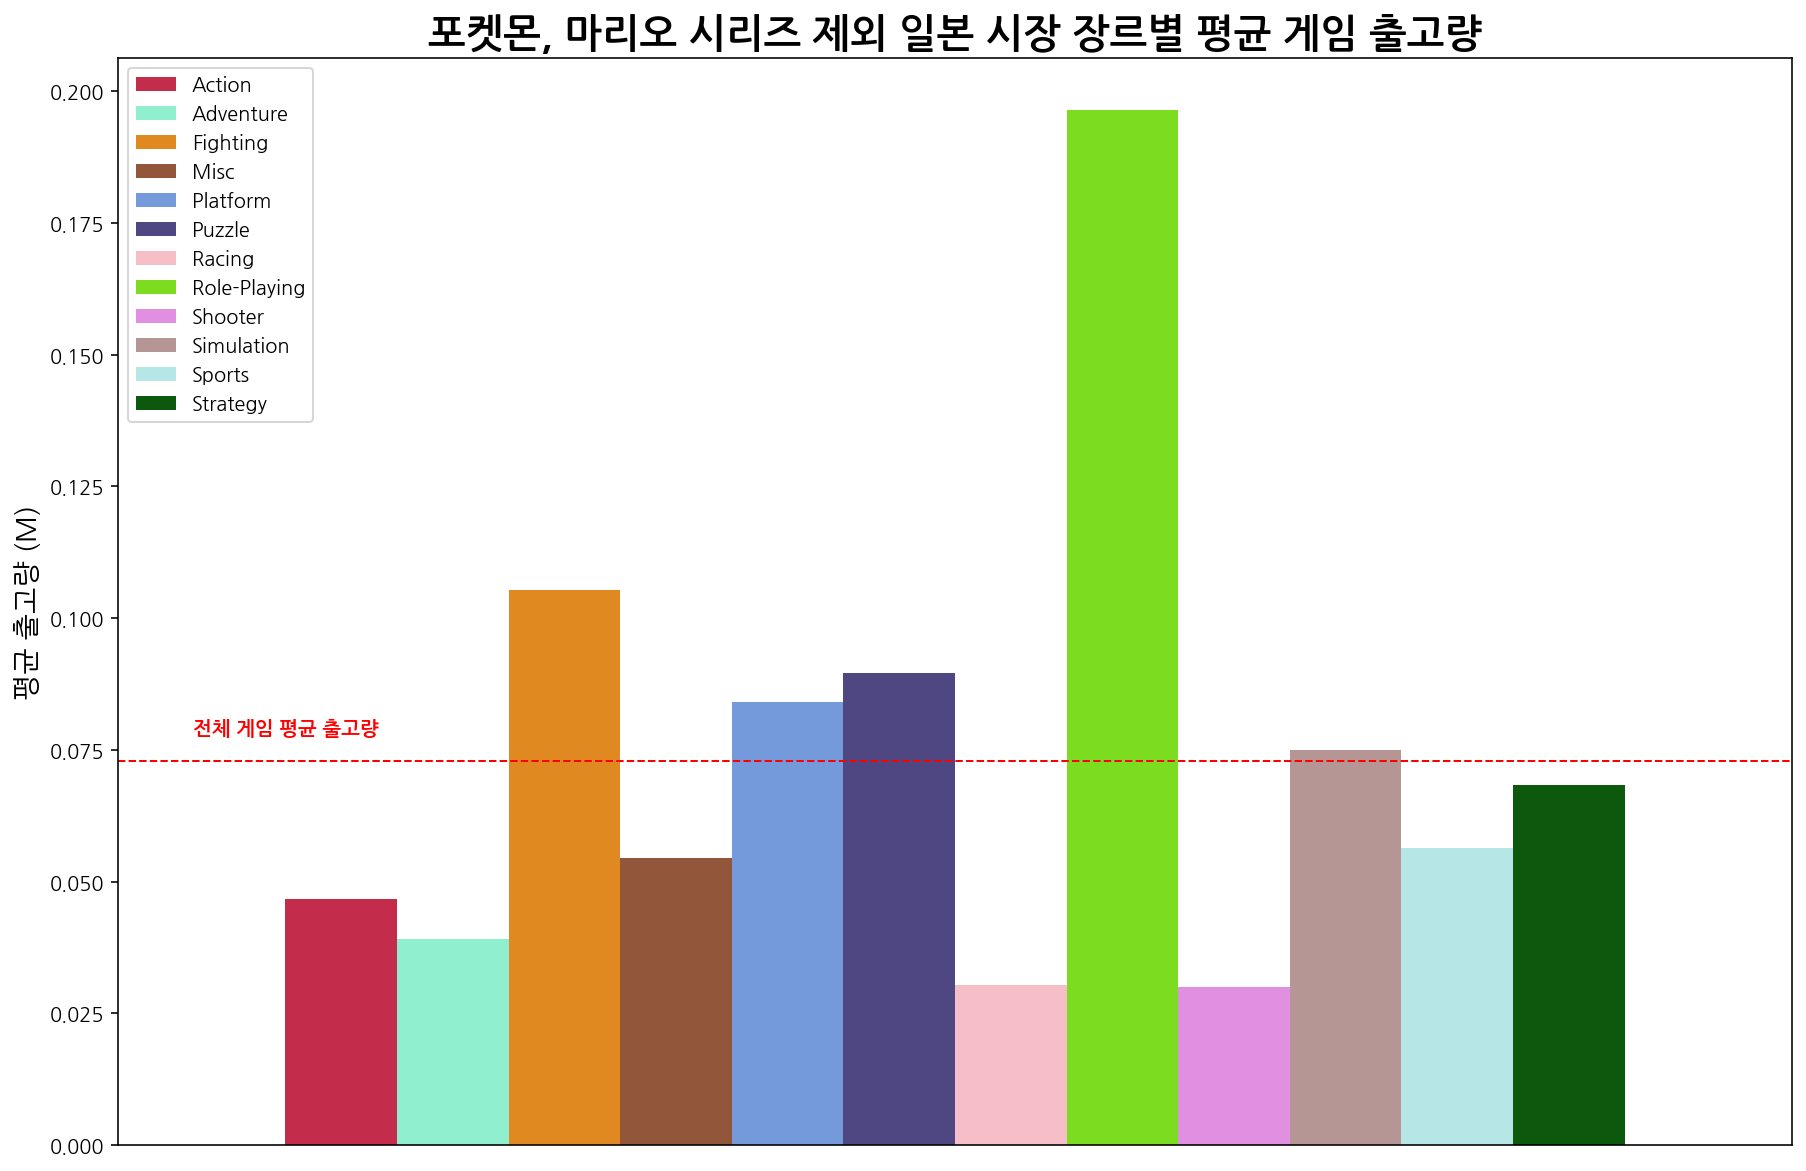

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'x', y = 'JP_Sales', data = japan_major_rm_sales, hue = 'Genre', palette = japan_major_rm_sales['Color'], ci=False)
plt.title('포켓몬, 마리오 시리즈 제외 일본 시장 장르별 평균 게임 출고량', fontsize=20, fontweight = 'bold')
plt.ylabel('평균 출고량 (M)', fontsize = 14)
plt.axhline(y=japan_major_rm_sales['JP_Sales'].mean(), linestyle = '--', color ='r', linewidth=1)
plt.gca().axes.xaxis.set_visible(False)
plt.text(-0.455, japan_major_rm_sales['JP_Sales'].mean()+ 0.005, '전체 게임 평균 출고량', color = 'r', weight = 'bold')
plt.legend(loc = 'upper left')
plt.show()

- 시각적으로 게임 장르별 출고량을 확인해보니, `포켓몬 마리오 시리즈`를 제외하지 않은 경우와 제외한 경우 모두, `Role-Playing` 게임의 평균 출고량이 높게 나타났습니다.
- `Action` 게임의 경우, 오히려 다른 게임들에 비해 평균 출고량은 낮게 나타났습니다.
- 해당 결과를 바탕으로 해석하면, `Role-Playing` 게임을 설계하는 것이 바람직해 보입니다.

### 통계 검정 수행
- 마지막으로 앞서 시각적으로 확인한 평균 출고량의 차이가 통계적으로도 유의미한지 가설검정을 통해 확인해봅시다.

#### 전체 데이터 사용 

In [ ]:
role = japan.query('Genre == "Role-Playing"')['JP_Sales']
not_role = japan.query('Genre != "Role-Playing"')['JP_Sales']

##### 선행 검정

1. 독립성 검정
- `japan` 데이터셋에서 `Genre`가 `Role-Playing`인지 여부에 있어 다른 어떠한 변수도 영향을 미치지 않았기 때문에 독립성을 만족합니다.


2. 정규성 검정
- $H_0$ : 정규성을 만족한다.
- $H_1$ : 정규성을 만족하지 않는다.

In [ ]:
print(len(role), len(not_role))

1423 14491


- 일반적으로 sample size가 30 이상인 경우, 중심극한정리에 의해 표본 평균 분포가 정규분포를 따른다고 가정합니다.
- 따라서 모집단의 분포를 정규분포 형태로 가정할 수 있습니다.

3. 등분산 검정
- $H_0$ : 등분산이다.
- $H_1$ : 등분산이 아니다. <br>


In [ ]:
stats.levene(role, not_role)

LeveneResult(statistic=368.5881180492868, pvalue=3.1441702700495174e-81)

- `p-value`가 0.05보다 낮기 때문에 등분산을 만족하지 않습니다.

##### 독립 표본 `t-검정` 수행
- $H_0$ : `Role-Playing` 게임은 다른 장르의 게임들과 평균 출고량이 같다.
- $H_1$ : `Role-Playing` 게임은 다른 장르의 게임들보다 평균 출고량이 다르다.

In [ ]:
pv = stats.ttest_ind(role, not_role, equal_var = False).pvalue
pv

1.631905195571923e-23

- `p-value`가 유의수준 0.05보다 매우 작으므로, 귀무가설을 기각합니다.
- 따라서 장르가 `Role-Playing`인 경우, 다른 장르의 게임보다 평균 출고량이 높음을 확인할 수 있습니다.

#### 포켓몬, 마리오 시리즈 제거한 데이터 사용




In [ ]:
role = japan_major_rm.query('Genre == "Role-Playing"')['JP_Sales']
not_role = japan_major_rm.query('Genre != "Role-Playing"')['JP_Sales']

##### 선행 검정

1. 독립성 검정
- `japan` 데이터셋에서 `Genre`가 `Role-Playing`인지 여부에 있어 다른 어떠한 변수도 영향을 미치지 않았기 때문에 독립성을 만족합니다.


2. 정규성 검정
- $H_0$ : 정규성을 만족한다.
- $H_1$ : 정규성을 만족하지 않는다.

In [ ]:
print(len(role), len(not_role))

1388 14370


- 일반적으로 sample size가 30 이상인 경우, 중심극한정리에 의해 표본 평균 분포가 정규분포를 따른다고 가정합니다.
- 따라서 모집단의 분포를 정규분포 형태로 가정할 수 있습니다.

3. 등분산 검정
- $H_0$ : 등분산이다.
- $H_1$ : 등분산이 아니다. <br>


In [ ]:
stats.levene(role, not_role)

LeveneResult(statistic=375.7561943997165, pvalue=9.589188893957308e-83)

- `p-value`가 0.05보다 낮기 때문에 등분산을 만족하지 않습니다.

##### 독립 표본 `t-검정` 수행
- $H_0$ : `Role-Playing` 게임은 다른 장르의 게임들과 평균 출고량이 같다.
- $H_1$ : `Role-Playing` 게임은 다른 장르의 게임들보다 평균 출고량이 다르다.

In [ ]:
pv = stats.ttest_ind(role, not_role, equal_var = False).pvalue
pv

1.9538014894883763e-27

- `p-value`가 유의수준 0.05보다 매우 작으므로, 귀무가설을 기각합니다.
- 따라서 장르가 `Role-Playing`인 경우, 다른 장르의 게임보다 평균 출고량이 높음을 확인할 수 있습니다.

## **인사이트 제시**
- 일본 시장 진출에서 성공하기 위해서, 최소 `Wii Series`, `PS Series`에서 구동 가능한 `Role-Playing` 게임을 설계하는 것이 바람직합니다.
- 일본 시장은 시리즈의 흥행으로 강력한 캐릭터성을 구축한 작품들이, 다음 시리즈에서도 계속해서 흥행하는 모습을 보이고 있습니다. 따라서 초기 개발한 게임에서 성공을 거두면 연이은 시리즈를 통해서도 성공 가능성이 높습니다.
- 일본 시장은 `포켓몬`, `마리오`와 같은 캐릭터의 인기가 굉장히 높습니다. 따라서 향후 게임 운영 단계에서 해당 캐릭터들과의 콜라보를 통해 사람들의 이목을 끌 수 있습니다.

## **분석 한계점**
- 결측치로서 약 300개의 데이터가 제거되었습니다.
- `Platform`을 `Platform_Series`로 변화하는 과정에서, 플랫폼을 통합하는 근거가 빈약합니다.
- `출고량`이라는 수치 변수 하나만으로 선호도, 트렌드, 인기 등 분석에 모든 내용을 진행했습니다.
- 게임 개발에 드는 비용을 고려하지 않았습니다.